# Data Mining Project
## From Reservation to Check-In: Data-Driven Insights for Optimizing Hotel Bookings - Predicting Cancellations and Understanding Customer Preferences
### Asif Mursalin - 60100148
### Ashraf Salem - 60104564
### Mehdi Bouktib - 60105112 

```bash
pip install -r requirements.txt
```

In [134]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import copy
import warnings
warnings.filterwarnings('ignore')

In [135]:
df = pd.read_csv("hotel_bookings_raw.csv")

First 5 rows

In [136]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,INFLATION,INFLATION_CHG,CSMR_SENT,UNRATE,INTRSRT,GDP,FUEL_PRCS,CPI_HOTELS,US_GINI,DIS_INC
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0


Last 10 rows

In [137]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,INFLATION,INFLATION_CHG,CSMR_SENT,UNRATE,INTRSRT,GDP,FUEL_PRCS,CPI_HOTELS,US_GINI,DIS_INC
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0


In [138]:
df.shape

(119390, 43)

# Hotel Booking Dataset Column Descriptions

## 1. Booking Status and Basic Information
- `hotel`: Type of hotel
- `is_canceled`: Whether the booking was canceled (binary: 0/1)
- `reservation_status`: Current status of the reservation
- `reservation_status_date`: Date of the last status update

## 2. Temporal Information
- `lead_time`: Number of days between booking and arrival date
- `arrival_date_year`: Year of arrival
- `arrival_date_month`: Month of arrival
- `arrival_date_week_number`: Week number of arrival
- `arrival_date_day_of_month`: Day of month of arrival
- `MO_YR`: Month and year combined

## 3. Stay Details
- `stays_in_weekend_nights`: Number of weekend nights booked
- `stays_in_week_nights`: Number of weekday nights booked
- `adults`: Number of adults
- `children`: Number of children
- `babies`: Number of babies

## 4. Room and Service Information
- `meal`: Type of meal plan
- `reserved_room_type`: Type of room reserved
- `assigned_room_type`: Type of room actually assigned
- `required_car_parking_spaces`: Number of parking spaces needed
- `total_of_special_requests`: Number of special requests made

## 5. Customer Information
- `country`: Country of origin
- `is_repeated_guest`: Whether the guest has stayed before
- `previous_cancellations`: Number of previous cancellations
- `previous_bookings_not_canceled`: Number of previous non-canceled bookings
- `customer_type`: Type of customer

## 6. Business/Distribution Information
- `market_segment`: Market segment (e.g., direct, corporate)
- `distribution_channel`: Booking distribution channel
- `agent`: ID of the travel agency
- `booking_changes`: Number of changes made to the booking
- `deposit_type`: Type of deposit made
- `adr`: Average Daily Rate
- `days_in_waiting_list`: Days spent on waiting list

## 7. Economic Indicators
- `CPI_AVG`: Consumer Price Index average
- `INFLATION`: Inflation rate
- `INFLATION_CHG`: Change in inflation
- `CSMR_SENT`: Consumer sentiment
- `UNRATE`: Unemployment rate
- `INTRSRT`: Interest rate
- `GDP`: Gross Domestic Product
- `FUEL_PRCS`: Fuel prices
- `CPI_HOTELS`: CPI specific to hotels
- `US_GINI`: Gini coefficient (income inequality measure)
- `DIS_INC`: Disposable income

In [139]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'MO_YR', 'CPI_AVG',
       'INFLATION', 'INFLATION_CHG', 'CSMR_SENT', 'UNRATE', 'INTRSRT', 'GDP',
       'FUEL_PRCS', 'CPI_HOTELS', 'US_GINI', 'DIS_INC'],
      dtype='object')

In [140]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [141]:
df['agent'] = df['agent'].astype('Int64')

In [142]:
binary_columns = ['is_canceled', 'is_repeated_guest']

# Date columns
date_columns = [
    'reservation_status_date'
]

# Numeric columns
numeric_columns = [
    'lead_time',
    'arrival_date_year',
    'arrival_date_week_number',
    'arrival_date_day_of_month',
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'adults',
    'children',
    'babies',
    'is_repeated_guest',
    'previous_cancellations',
    'previous_bookings_not_canceled',
    'booking_changes',
    'days_in_waiting_list',
    'adr',
    'required_car_parking_spaces',
    'total_of_special_requests',
    'CPI_AVG',
    'INFLATION',
    'INFLATION_CHG',
    'CSMR_SENT',
    'UNRATE',
    'INTRSRT',
    'GDP',
    'FUEL_PRCS',
    'CPI_HOTELS',
    'US_GINI',
    'DIS_INC'
]

# Categorical columns
categorical_columns = [
    'hotel',
    'arrival_date_month',
    'meal',
    'country',
    'market_segment',
    'distribution_channel',
    'reserved_room_type',
    'assigned_room_type',
    'deposit_type',
    'customer_type',
    'reservation_status',
    'agent' 
]

In [143]:
def fix_datatypes(df):
    # Make a copy to avoid modifying the original dataframe
    df = copy.deepcopy(df)
    
    # Convert dates
    for col in date_columns:
        df[col] = pd.to_datetime(df[col])
    
    # Convert numeric columns
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Convert categorical columns
    for col in categorical_columns:
        df[col] = df[col].astype('category')
    
    # Convert binary columns
    for col in binary_columns:
        df[col] = df[col].astype('bool')
    # Handle 'MO_YR' as string
    df['MO_YR'] = df['MO_YR'].astype(str)
    
    return df

In [144]:
df = fix_datatypes(df)
df.dtypes

hotel                                   category
is_canceled                                 bool
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                      category
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                    category
country                                 category
market_segment                          category
distribution_channel                    category
is_repeated_guest                           bool
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                      category
assigned_room_type  

In [145]:
booking_by_month = df.groupby(['arrival_date_month', 'hotel']).size()
booking_by_month

arrival_date_month  hotel       
April               City Hotel      7480
                    Resort Hotel    3609
August              City Hotel      8983
                    Resort Hotel    4894
December            City Hotel      4132
                    Resort Hotel    2648
February            City Hotel      4965
                    Resort Hotel    3103
January             City Hotel      3736
                    Resort Hotel    2193
July                City Hotel      8088
                    Resort Hotel    4573
June                City Hotel      7894
                    Resort Hotel    3045
March               City Hotel      6458
                    Resort Hotel    3336
May                 City Hotel      8232
                    Resort Hotel    3559
November            City Hotel      4357
                    Resort Hotel    2437
October             City Hotel      7605
                    Resort Hotel    3555
September           City Hotel      7400
                    Reso

In [146]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = go.Figure()

# Add traces, one for each hotel
for hotel_type in df['hotel'].unique():
    hotel_data = df[df['hotel'] == hotel_type]
    monthly_counts = hotel_data['arrival_date_month'].value_counts().reset_index()
    monthly_counts.columns = ['Month', 'Bookings']
    
    # Define month order
    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    
    monthly_counts['Month'] = pd.Categorical(monthly_counts['Month'], 
                                           categories=month_order, 
                                           ordered=True)
    monthly_counts = monthly_counts.sort_values('Month')
    
    fig.add_trace(
        go.Bar(
            name=hotel_type,
            x=monthly_counts['Month'],
            y=monthly_counts['Bookings'],
            visible=True
        )
    )

# Add buttons for hotel selection
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            x=0.7,
            y=1.2,
            showactive=True,
            buttons=list([
                dict(
                    label="All Hotels",
                    method="update",
                    args=[{"visible": [True, True]},
                          {"title": "All Hotels Booking Distribution"}]),
                dict(
                    label="Resort Hotel",
                    method="update",
                    args=[{"visible": [True, False]},
                          {"title": "Resort Hotel Booking Distribution"}]),
                dict(
                    label="City Hotel",
                    method="update",
                    args=[{"visible": [False, True]},
                          {"title": "City Hotel Booking Distribution"}])
            ]),
        )
    ]
)

# Update layout
fig.update_layout(
    title="Hotel Bookings Distribution",
    xaxis_title="Month",
    yaxis_title="Number of Bookings",
    barmode='group',
    height=600,
    width=1000,
    showlegend=True
)

fig.show()

# Dealing with missing values

In [147]:
missing_values_count = df.isnull().sum()[df.isnull().sum()>0]
total_missing = df.isnull().sum().sum() 

print("Missing values per column:\n", missing_values_count)
print("Total missing values:", total_missing)


Missing values per column:
 children             4
country            488
agent            16340
CPI_AVG            181
INFLATION          181
INFLATION_CHG      181
CSMR_SENT          181
UNRATE             181
INTRSRT            181
GDP                181
FUEL_PRCS          181
CPI_HOTELS         181
US_GINI            181
DIS_INC            181
dtype: int64
Total missing values: 18823


## Visualizing missing values in a column

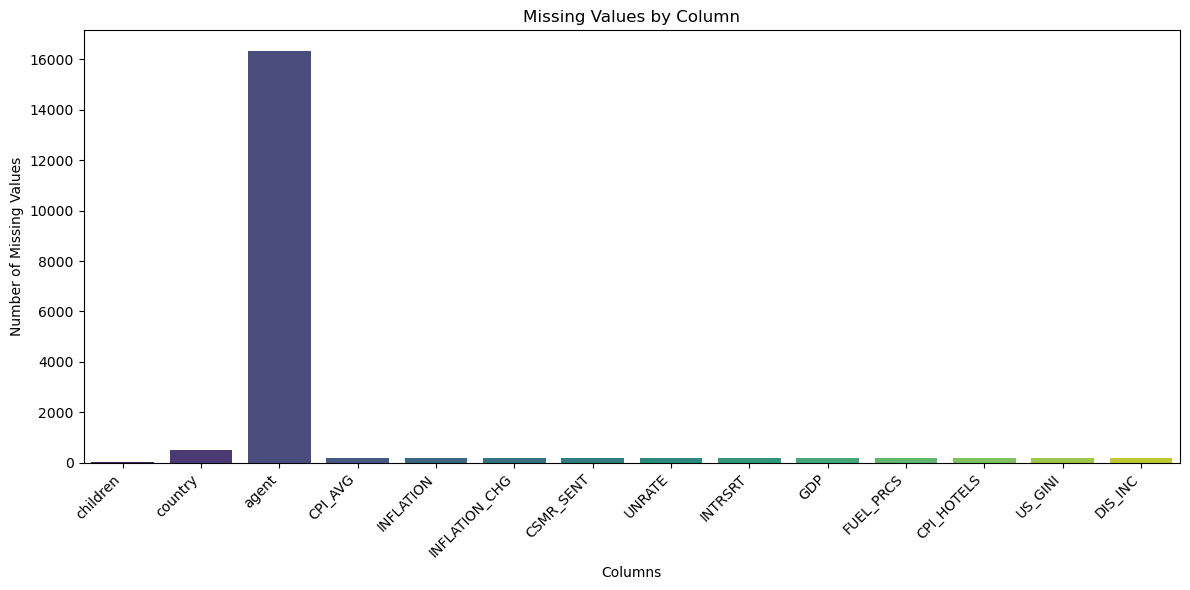

In [148]:

# Create figure with specified size
plt.figure(figsize=(12, 6))

# Create bar plot
sns.barplot(x=missing_values_count.index, 
            y=missing_values_count.values,
            hue=missing_values_count.index,
            palette='viridis')

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.title('Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

- The children column contains the number of children the guest will bring
- We will asssume the null value means the guest has no children

## Children Missing 

In [149]:
# Fill children column missing values
# df['children'].fillna(0, inplace=True)
df['children'] = df['children'].fillna(0)

## Country missing

In [150]:
# Replace missing values with the mode of the column country
mode_country = df['country'].mode()[0]
print(mode_country)
df['country'] = df['country'].fillna(mode_country)

PRT


## Agent Missing

In [151]:
df['agent'] = df['agent'].astype('object')  # temporarily convert to object
df['agent'] = df['agent'].fillna(0)

df['agent'] = df['agent'].astype('category')

In [152]:
df[['agent']].head()

,agent
0,0
1,0
2,0
3,304
4,240


Replacing missing values with '0' of the column Agent as it states that no agent was involved in the booking

In [153]:
missing_values_count = df.isnull().sum()[df.isnull().sum()>0]
total_missing = df.isnull().sum().sum() 

print("Missing values per column:\n", missing_values_count)
print("Total missing values:", total_missing)

Missing values per column:
 CPI_AVG          181
INFLATION        181
INFLATION_CHG    181
CSMR_SENT        181
UNRATE           181
INTRSRT          181
GDP              181
FUEL_PRCS        181
CPI_HOTELS       181
US_GINI          181
DIS_INC          181
dtype: int64
Total missing values: 1991


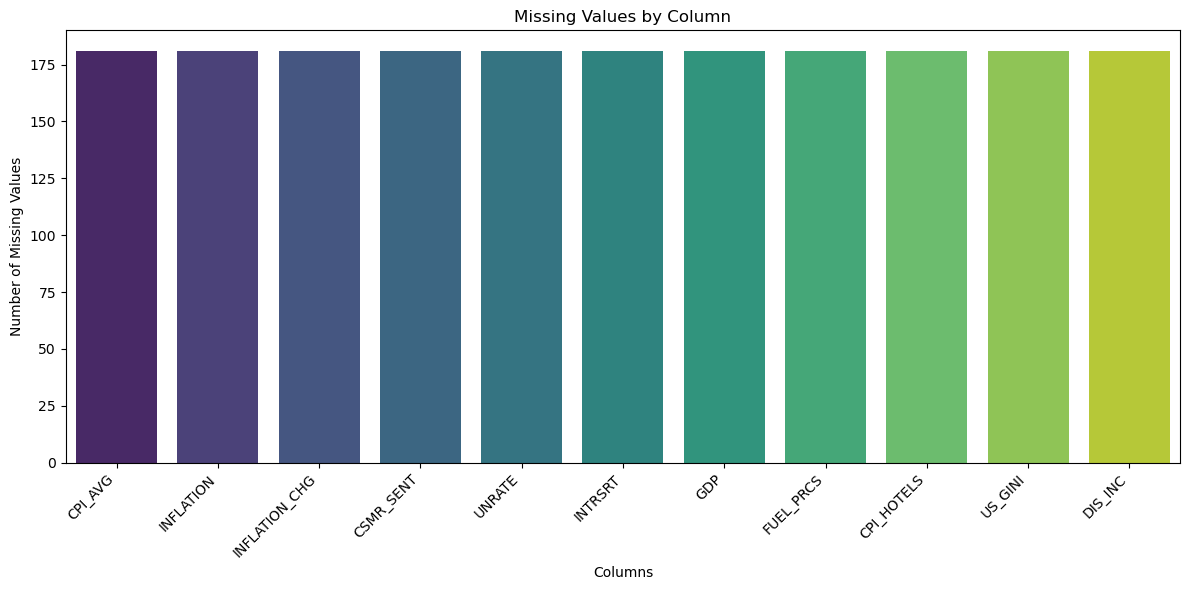

In [154]:

# Create figure with specified size
plt.figure(figsize=(12, 6))

# Create bar plot
sns.barplot(x=missing_values_count.index, 
            y=missing_values_count.values,
            hue=missing_values_count.index,
            palette='viridis')

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.title('Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

## CPI_AVG
- replacing the null values in the CPI_AVG columns that indicates consumer price index average with mean as it maintains the dataset's overall balance and avoids skewing results

In [155]:
mean_CPI = df['CPI_AVG'].mean()
print(mean_CPI)
df['CPI_AVG'] = df['CPI_AVG'].fillna(mean_CPI)

240.78065240879465


## Inflation
- replacing null values in the Inflation column with Interpolation as it Estimates missing values based on surrounding data points, preserving the column’s natural trends over time

In [156]:
df['INFLATION'] = df['INFLATION'].interpolate(method='linear')
print(df['INFLATION'].isnull().sum())


0


## CSMR_SENT (costumer sentiment)


In [157]:
# Replace missing values with the mode of the column CSMR_SENT
mode_csmr = df['CSMR_SENT'].mode()[0]
print(mode_csmr)
df['CSMR_SENT'] = df['CSMR_SENT'].fillna(mode_csmr)

90.0


## UNRATE (Unemployment rate) 
- replacing the null values in the UNRATE column that indicates Unemployment rate with mean as it maintains the dataset's overall balance and avoids skewing results

In [158]:
Unrate_Mean = df['UNRATE'].mean()
print(Unrate_Mean)
df['UNRATE'] = df['UNRATE'].fillna(Unrate_Mean)

4.827967687003499


Text(0, 0.5, 'Count')

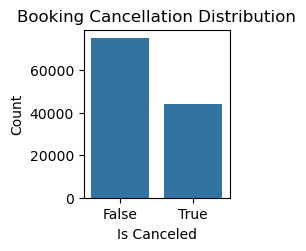

In [159]:
plt.subplot(2, 3, 1)
sns.countplot(data=df, x='is_canceled')
plt.title('Booking Cancellation Distribution')
plt.xlabel('Is Canceled')
plt.ylabel('Count')

# Customer Segmentation

Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.99      0.96     14907
        True       0.98      0.90      0.93      8971

    accuracy                           0.95     23878
   macro avg       0.96      0.94      0.95     23878
weighted avg       0.95      0.95      0.95     23878



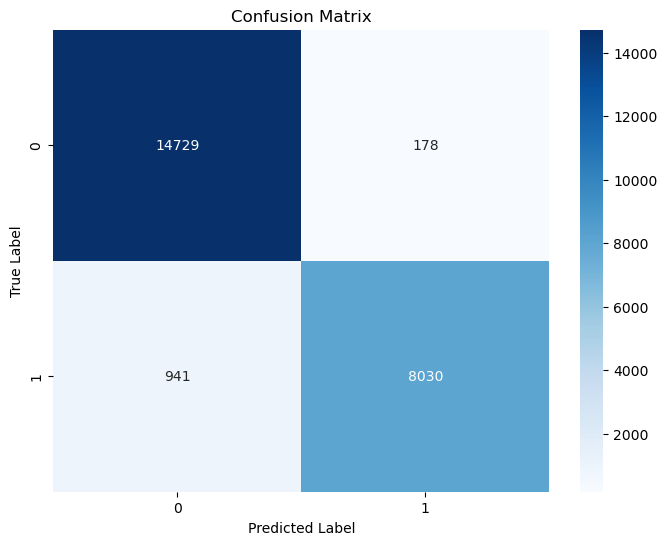

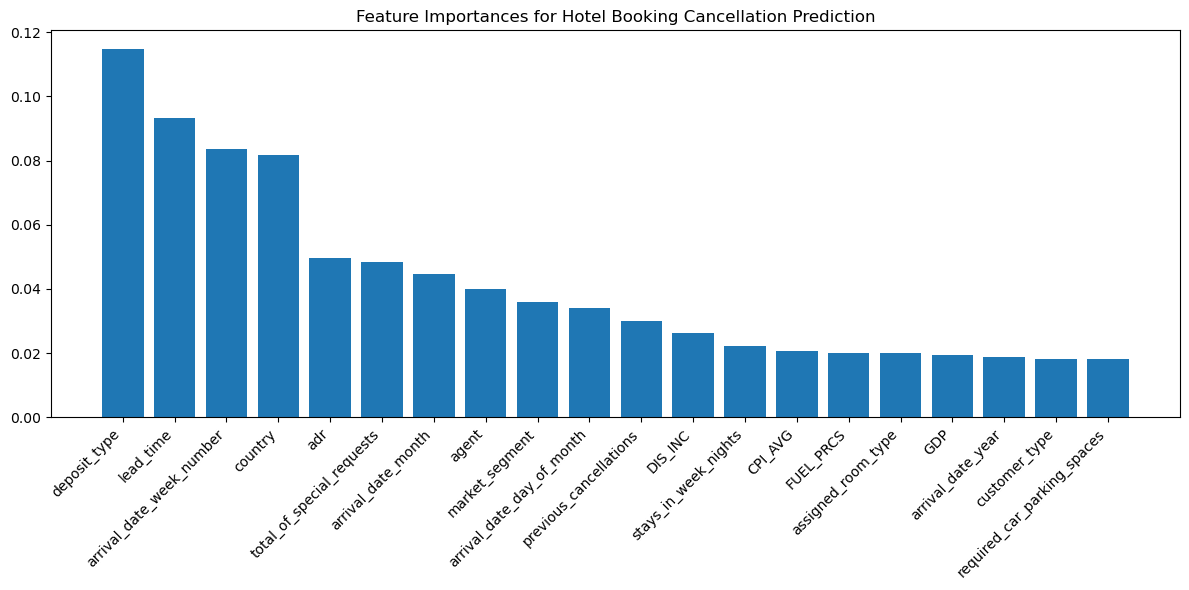


Top 20 Most Important Features:
deposit_type: 0.1149
lead_time: 0.0934
arrival_date_week_number: 0.0837
country: 0.0817
adr: 0.0498
total_of_special_requests: 0.0485
arrival_date_month: 0.0446
agent: 0.0398
market_segment: 0.0360
arrival_date_day_of_month: 0.0340
previous_cancellations: 0.0299
DIS_INC: 0.0263
stays_in_week_nights: 0.0221
CPI_AVG: 0.0208
FUEL_PRCS: 0.0201
assigned_room_type: 0.0200
GDP: 0.0194
arrival_date_year: 0.0188
customer_type: 0.0183
required_car_parking_spaces: 0.0182


In [160]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def prepare_data(df):
    # Create a copy to avoid modifying the original dataframe
    df_model = df.copy()
    
    # Drop columns that shouldn't be used for prediction
    columns_to_drop = ['reservation_status', 'reservation_status_date', 'MO_YR']
    df_model = df_model.drop(columns=columns_to_drop, errors='ignore')
    
    
    # Encode categorical variables
    le = LabelEncoder()
    for column in categorical_columns:
        if column in df_model.columns:
            df_model[column] = le.fit_transform(df_model[column].astype(str))
    
    return df_model

def train_random_forest(X, y):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and train the model
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = rf.predict(X_test)
    
    return rf, X_train, X_test, y_train, y_test, y_pred

def plot_feature_importance(rf, feature_names):
    # Get feature importance
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    # Plot the feature importances
    plt.figure(figsize=(12, 6))
    plt.title("Feature Importances for Hotel Booking Cancellation Prediction")
    plt.bar(range(20), importances[indices][:20])
    plt.xticks(range(20), [feature_names[i] for i in indices][:20], rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Print numerical values
    print("\nTop 20 Most Important Features:")
    for i in range(20):
        print(f"{feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

def analyze_cancellations():
    # Prepare the data
    df_model = prepare_data(df)
    
    # Separate features and target
    X = df_model.drop('is_canceled', axis=1)
    y = df_model['is_canceled']
    
    # Train the model and get predictions
    rf, X_train, X_test, y_train, y_test, y_pred = train_random_forest(X, y)
    
    # Print model performance
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Plot feature importance
    plot_feature_importance(rf, X.columns)
    
    return rf, X, y

# Run the analysis
rf_model, X, y = analyze_cancellations()

Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.99      0.96     14907
        True       0.98      0.90      0.93      8971

    accuracy                           0.95     23878
   macro avg       0.96      0.94      0.95     23878
weighted avg       0.95      0.95      0.95     23878



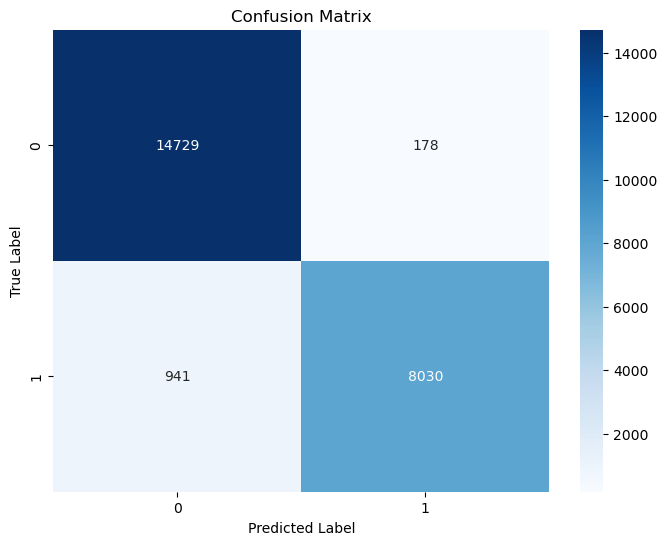

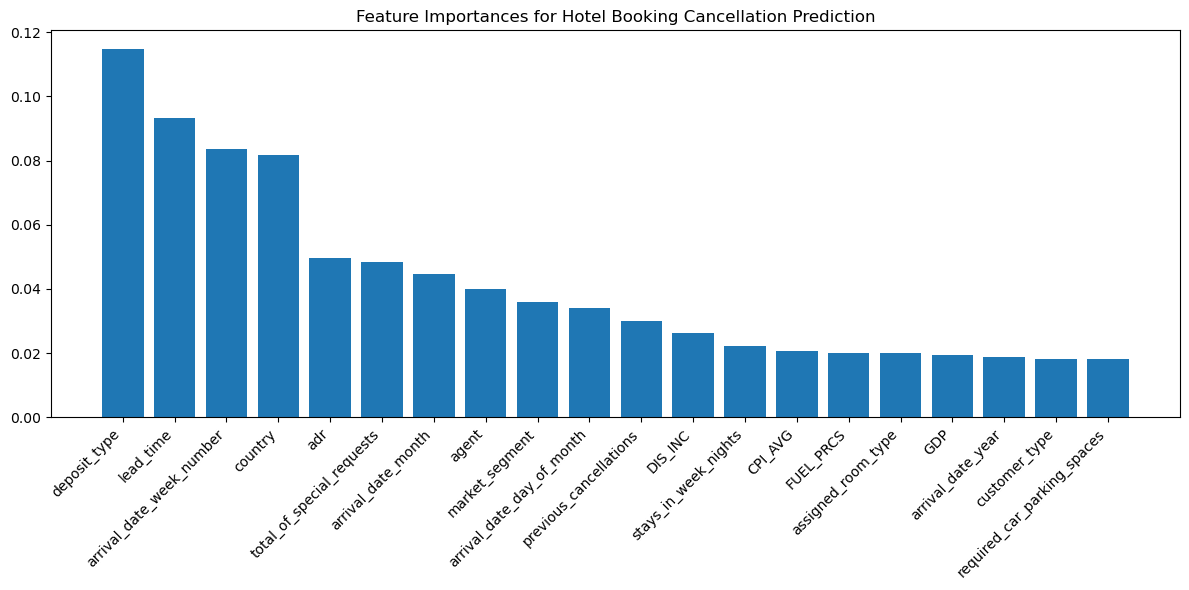


Top 20 Most Important Features:
deposit_type: 0.1149
lead_time: 0.0934
arrival_date_week_number: 0.0837
country: 0.0817
adr: 0.0498
total_of_special_requests: 0.0485
arrival_date_month: 0.0446
agent: 0.0398
market_segment: 0.0360
arrival_date_day_of_month: 0.0340
previous_cancellations: 0.0299
DIS_INC: 0.0263
stays_in_week_nights: 0.0221
CPI_AVG: 0.0208
FUEL_PRCS: 0.0201
assigned_room_type: 0.0200
GDP: 0.0194
arrival_date_year: 0.0188
customer_type: 0.0183
required_car_parking_spaces: 0.0182


In [161]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def prepare_data(df):
    # Create a copy to avoid modifying the original dataframe
    df_model = df.copy()
    
    # Drop columns that shouldn't be used for prediction
    columns_to_drop = ['reservation_status', 'reservation_status_date', 'MO_YR']
    df_model = df_model.drop(columns=columns_to_drop, errors='ignore')
    
    
    # Encode categorical variables
    le = LabelEncoder()
    for column in categorical_columns:
        if column in df_model.columns:
            df_model[column] = le.fit_transform(df_model[column].astype(str))
    
    return df_model

def train_random_forest(X, y):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and train the model
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = rf.predict(X_test)
    
    return rf, X_train, X_test, y_train, y_test, y_pred

def plot_feature_importance(rf, feature_names):
    # Get feature importance
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    # Plot the feature importances
    plt.figure(figsize=(12, 6))
    plt.title("Feature Importances for Hotel Booking Cancellation Prediction")
    plt.bar(range(20), importances[indices][:20])
    plt.xticks(range(20), [feature_names[i] for i in indices][:20], rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Print numerical values
    print("\nTop 20 Most Important Features:")
    for i in range(20):
        print(f"{feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

def analyze_cancellations():
    # Prepare the data
    df_model = prepare_data(df)
    
    # Separate features and target
    X = df_model.drop('is_canceled', axis=1)
    y = df_model['is_canceled']
    
    # Train the model and get predictions
    rf, X_train, X_test, y_train, y_test, y_pred = train_random_forest(X, y)
    
    # Print model performance
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Plot feature importance
    plot_feature_importance(rf, X.columns)
    
    return rf, X, y

# Run the analysis
rf_model, X, y = analyze_cancellations()

Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.99      0.96     14907
        True       0.98      0.90      0.93      8971

    accuracy                           0.95     23878
   macro avg       0.96      0.94      0.95     23878
weighted avg       0.95      0.95      0.95     23878



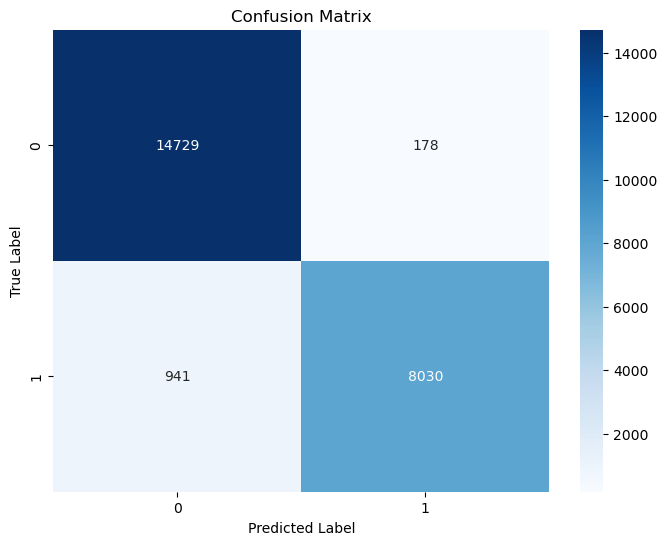

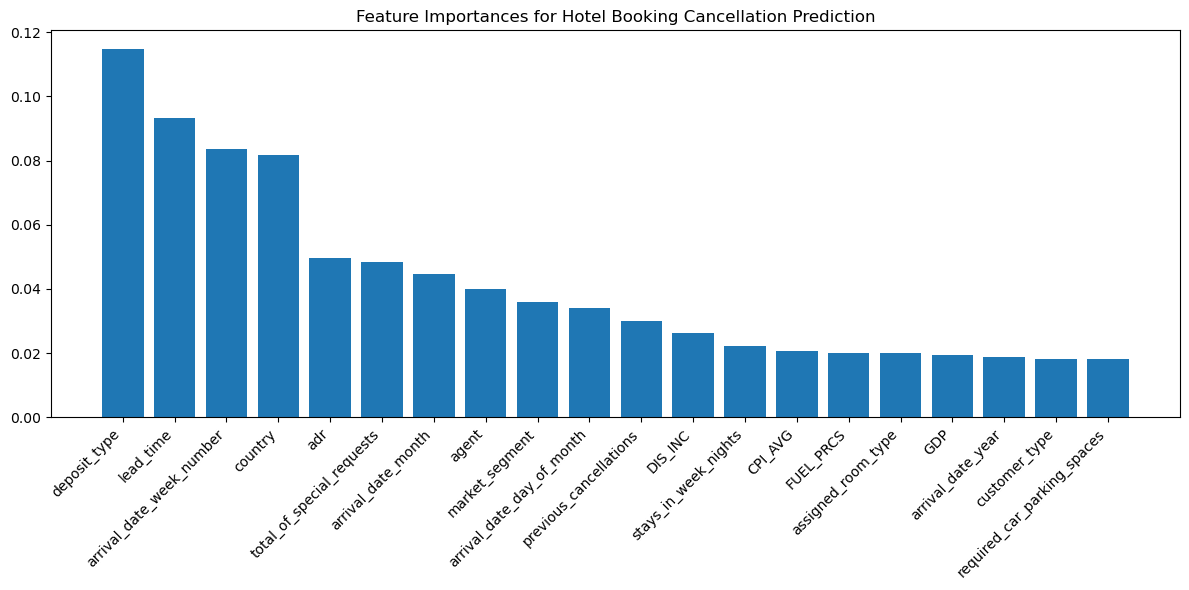


Top 20 Most Important Features:
deposit_type: 0.1149
lead_time: 0.0934
arrival_date_week_number: 0.0837
country: 0.0817
adr: 0.0498
total_of_special_requests: 0.0485
arrival_date_month: 0.0446
agent: 0.0398
market_segment: 0.0360
arrival_date_day_of_month: 0.0340
previous_cancellations: 0.0299
DIS_INC: 0.0263
stays_in_week_nights: 0.0221
CPI_AVG: 0.0208
FUEL_PRCS: 0.0201
assigned_room_type: 0.0200
GDP: 0.0194
arrival_date_year: 0.0188
customer_type: 0.0183
required_car_parking_spaces: 0.0182


In [162]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def prepare_data(df):
    # Create a copy to avoid modifying the original dataframe
    df_model = df.copy()
    
    # Drop columns that shouldn't be used for prediction
    columns_to_drop = ['reservation_status', 'reservation_status_date', 'MO_YR']
    df_model = df_model.drop(columns=columns_to_drop, errors='ignore')
    
    
    # Encode categorical variables
    le = LabelEncoder()
    for column in categorical_columns:
        if column in df_model.columns:
            df_model[column] = le.fit_transform(df_model[column].astype(str))
    
    return df_model

def train_random_forest(X, y):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and train the model
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = rf.predict(X_test)
    
    return rf, X_train, X_test, y_train, y_test, y_pred

def plot_feature_importance(rf, feature_names):
    # Get feature importance
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    # Plot the feature importances
    plt.figure(figsize=(12, 6))
    plt.title("Feature Importances for Hotel Booking Cancellation Prediction")
    plt.bar(range(20), importances[indices][:20])
    plt.xticks(range(20), [feature_names[i] for i in indices][:20], rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Print numerical values
    print("\nTop 20 Most Important Features:")
    for i in range(20):
        print(f"{feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

def analyze_cancellations():
    # Prepare the data
    df_model = prepare_data(df)
    
    # Separate features and target
    X = df_model.drop('is_canceled', axis=1)
    y = df_model['is_canceled']
    
    # Train the model and get predictions
    rf, X_train, X_test, y_train, y_test, y_pred = train_random_forest(X, y)
    
    # Print model performance
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Plot feature importance
    plot_feature_importance(rf, X.columns)
    
    return rf, X, y

# Run the analysis
rf_model, X, y = analyze_cancellations()

### Country of origin (top booking countries)


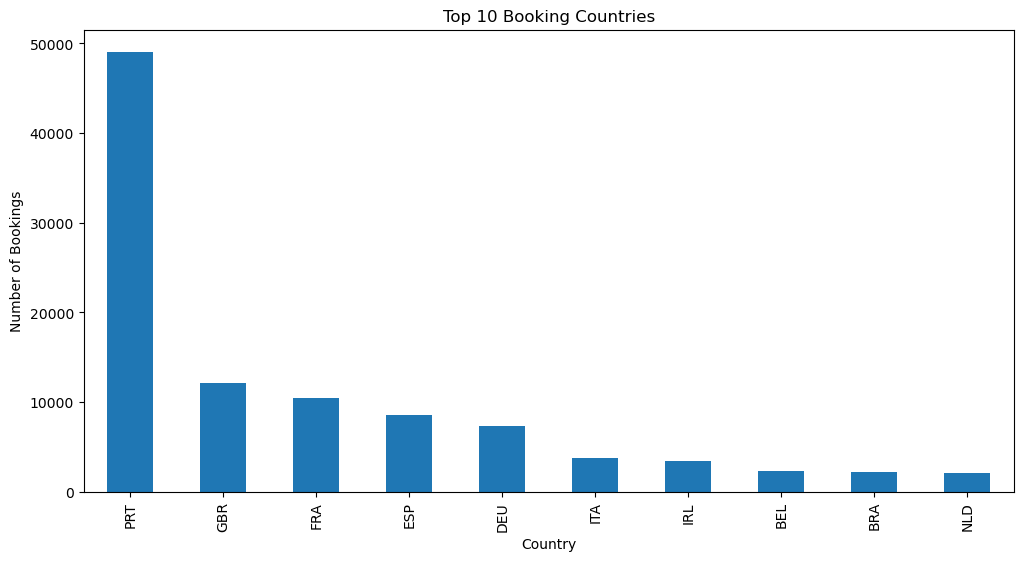

country
PRT    49078
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: count, dtype: int64

In [163]:
def country_analysis(dataframe):
    # Count bookings by country
    country_counts = dataframe['country'].value_counts().head(10)
    
    plt.figure(figsize=(12,6))
    country_counts.plot(kind='bar')
    plt.title('Top 10 Booking Countries')
    plt.xlabel('Country')
    plt.ylabel('Number of Bookings')
    plt.show()
    
    return country_counts
country_analysis(df)


### Customer type

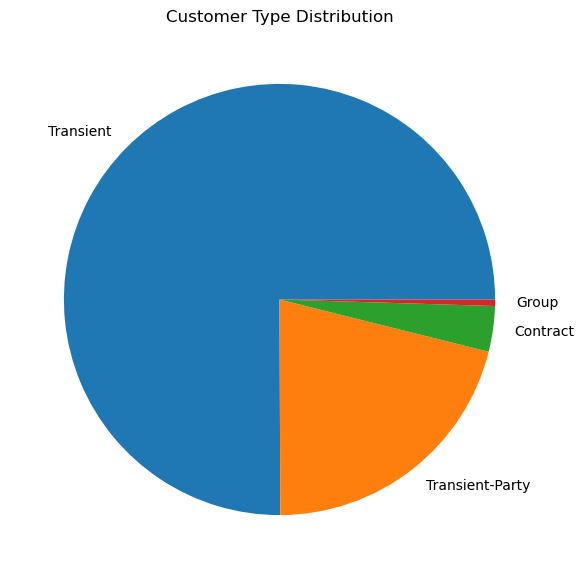

customer_type
Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: count, dtype: int64

In [164]:
# Customer Type Breakdown Analysis
def customer_type_analysis(df):
    customer_type_dist = df['customer_type'].value_counts()
    
    plt.figure(figsize=(10,7))
    customer_type_dist.plot(kind='pie')
    plt.title('Customer Type Distribution')
    plt.ylabel('')
    plt.show()
    
    return customer_type_dist

# Execute the function
customer_type_analysis(df)


### Repeat vs. new customers

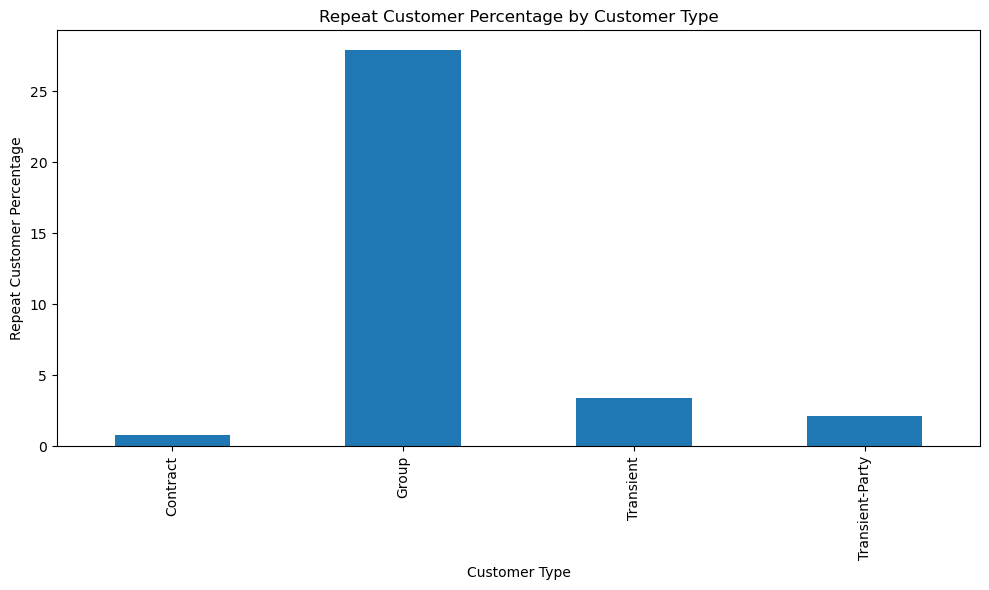

customer_type
Contract            0.809617
Group              27.902946
Transient           3.429190
Transient-Party     2.161280
Name: is_repeated_guest, dtype: float64

In [165]:
def repeat_customer_analysis(df):
    repeat_customers = df.groupby('customer_type')['is_repeated_guest'].mean() * 100 # For Percentage view
    
    plt.figure(figsize=(10,6))
    repeat_customers.plot(kind='bar')
    plt.title('Repeat Customer Percentage by Customer Type')
    plt.xlabel('Customer Type')
    plt.ylabel('Repeat Customer Percentage')
    plt.tight_layout()
    plt.show()
    
    return repeat_customers

# Execute the function
repeat_customer_analysis(df)


# Stay Duration Analysis

In [166]:
def calculate_total_stay_nights(df):
    """Calculate total nights stayed per booking by adding a new column"""
    df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
    return df

def analyze_stay_duration(df):
    """Analyze various aspects of stay duration"""
    stats = {
        'Average total nights': df['total_nights'].mean(),
        'Median total nights': df['total_nights'].median(),
        'Most common duration': df['total_nights'].mode().iloc[0],
        'Max stay duration': df['total_nights'].max(),
        'Min stay duration': df['total_nights'].min()
    }
    print("\nStay Duration Statistics:")
    for metric, value in stats.items():
        print(f"{metric}: {value:.2f} days")

def analyze_weekend_vs_weekday(df):
    """Analyze weekend vs weekday stay patterns"""
    
    # Calculate averages by hotel type
    hotel_stays = df.groupby('hotel').agg({
        'stays_in_weekend_nights': 'mean',
        'stays_in_week_nights': 'mean',
        'total_nights': 'mean'
    }).round(2)
    
    print("\nAverage Stays by Hotel Type:")
    print(hotel_stays)
    
    # Calculate weekend vs weekday ratio
    df['weekend_ratio'] = df['stays_in_weekend_nights'] / df['total_nights']
    avg_weekend_ratio = df['weekend_ratio'].mean()
    
    print(f"\nAverage proportion of weekend nights for both hotels: {avg_weekend_ratio:.2%}")
    
def analyze_seasonal_patterns(df):
    """Analyze stay duration patterns by season/month for each hotel type"""
    
    # Create month order for consistent sorting
    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    
    # Calculate average stay duration by month and hotel type
    monthly_stays = df.groupby(['arrival_date_month', 'hotel'])['total_nights'].mean().unstack()
    monthly_stays = monthly_stays.reindex(month_order)
    
    # Calculate total nights stayed by month and hotel type
    monthly_total_stays = df.groupby(['arrival_date_month', 'hotel'])['total_nights'].sum().unstack()
    monthly_total_stays = monthly_total_stays.reindex(month_order)
    
    print("\nAverage Stay Duration by Month and Hotel Type (nights per booking):")
    print(monthly_stays.round(2))
    
    print("\nTotal Nights Stayed by Month and Hotel Type:")
    print(monthly_total_stays.round(2))
    
    # Calculate total nights for each hotel type
    total_nights_by_hotel = df.groupby('hotel')['total_nights'].sum()
    print("\nTotal Nights Stayed at Each Hotel:")
    print(total_nights_by_hotel)
    
    # Analyze patterns for City Hotel
    city_peak_month = monthly_stays['City Hotel'].idxmax()
    city_low_month = monthly_stays['City Hotel'].idxmin()
    city_peak_value = monthly_stays['City Hotel'].max()
    city_low_value = monthly_stays['City Hotel'].min()
    
    # Analyze patterns for Resort Hotel
    resort_peak_month = monthly_stays['Resort Hotel'].idxmax()
    resort_low_month = monthly_stays['Resort Hotel'].idxmin()
    resort_peak_value = monthly_stays['Resort Hotel'].max()
    resort_low_value = monthly_stays['Resort Hotel'].min()
    
    print("\nCity Hotel Seasonal Patterns:")
    print(f"Peak month: {city_peak_month}")
    print(f"- Average stay: {city_peak_value:.2f} nights per booking")
    print(f"- Total nights: {monthly_total_stays.loc[city_peak_month, 'City Hotel']:.0f} nights")
    print(f"Low month: {city_low_month}")
    print(f"- Average stay: {city_low_value:.2f} nights per booking")
    print(f"- Total nights: {monthly_total_stays.loc[city_low_month, 'City Hotel']:.0f} nights")
    
    print("\nResort Hotel Seasonal Patterns:")
    print(f"Peak month: {resort_peak_month}")
    print(f"- Average stay: {resort_peak_value:.2f} nights per booking")
    print(f"- Total nights: {monthly_total_stays.loc[resort_peak_month, 'Resort Hotel']:.0f} nights")
    print(f"Low month: {resort_low_month}")
    print(f"- Average stay: {resort_low_value:.2f} nights per booking")
    print(f"- Total nights: {monthly_total_stays.loc[resort_low_month, 'Resort Hotel']:.0f} nights")
    
    # Calculate and display year-round statistics
    hotel_stats = df.groupby('hotel').agg({
        'total_nights': ['mean', 'sum', 'count']
    })
    hotel_stats.columns = ['Average Stay', 'Total Nights', 'Number of Bookings']
    
    print("\nYear-round Statistics by Hotel Type:")
    print(hotel_stats.round(2))
    
    # Calculate monthly share of total nights for each hotel
    print("\nMonthly Share of Total Nights (%):")
    monthly_share = monthly_total_stays.div(monthly_total_stays.sum()) * 100
    print(monthly_share.round(2))



In [167]:
def analyze_stay_duration_by_category(df, figsize=(10, 6), font_size=10):
    """
    Create separate correlation heatmaps for stay duration vs each category.
    
    Parameters:
    -----------
    df : pandas DataFrame
        The hotel bookings dataset
    figsize : tuple
        Size of each heatmap (width, height)
    font_size : int
        Base font size for the plots
    """
    
    # Ensure total_nights column exists
    if 'total_nights' not in df.columns:
        df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
    
    # Create dummy variables for each category
    categories = {
        'Market Segments': pd.get_dummies(df['market_segment'], prefix='market'),
        'Customer Types': pd.get_dummies(df['customer_type'], prefix='customer'),
        'Room Types': pd.get_dummies(df['assigned_room_type'], prefix='room')
    }
    
    # Create separate heatmaps for each category
    for category_name, dummies in categories.items():
        # Add total_nights to the dummy variables
        category_df = pd.concat([
            pd.DataFrame({'total_nights': df['total_nights']}),
            dummies
        ], axis=1)
        
        # Calculate correlation matrix
        correlation_matrix = category_df.corr()
        
        # Create figure
        plt.figure(figsize=figsize)
        
        # Create heatmap
        sns.heatmap(correlation_matrix, 
                   annot=True,
                   cmap='coolwarm',
                   center=0,
                   fmt='.2f',
                   square=True,
                   linewidths=0.5)
        
        # Customize plot
        plt.title(f'Stay Duration vs {category_name} Correlation', 
                 pad=20, 
                 fontsize=font_size + 2)
        
        # Rotate labels for better readability
        plt.xticks(rotation=45, ha='right', fontsize=font_size)
        plt.yticks(rotation=0, fontsize=font_size)
        
        # Adjust layout
        plt.tight_layout()
        plt.show()

In [168]:
# Calculate total nights for each booking
df_copy = df.copy()
df_copy = calculate_total_stay_nights(df_copy)
# # Run all analyses
print("=== Hotel Stay Duration Analysis ===")
analyze_stay_duration(df_copy)
analyze_weekend_vs_weekday(df_copy)
analyze_seasonal_patterns(df_copy)
# analyze_stay_distribution(df)

=== Hotel Stay Duration Analysis ===

Stay Duration Statistics:
Average total nights: 3.43 days
Median total nights: 3.00 days
Most common duration: 2.00 days
Max stay duration: 69.00 days
Min stay duration: 0.00 days

Average Stays by Hotel Type:
              stays_in_weekend_nights  stays_in_week_nights  total_nights
hotel                                                                    
City Hotel                       0.80                  2.18          2.98
Resort Hotel                     1.19                  3.13          4.32

Average proportion of weekend nights for both hotels: 25.47%

Average Stay Duration by Month and Hotel Type (nights per booking):
hotel               City Hotel  Resort Hotel
arrival_date_month                          
January                   3.01          2.91
February                  2.99          3.10
March                     3.05          4.13
April                     3.05          4.03
May                       2.84          4.29
June      

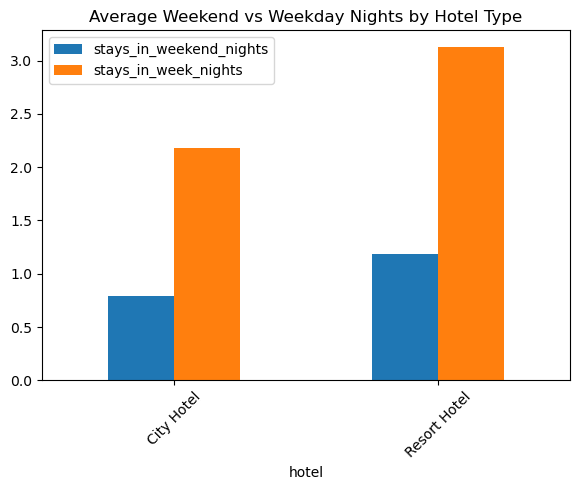

In [169]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
weekend_weekday = df.groupby('hotel')[['stays_in_weekend_nights', 'stays_in_week_nights']].mean()
weekend_weekday.plot(kind='bar', ax=plt.gca())
plt.title('Average Weekend vs Weekday Nights by Hotel Type')
plt.xticks(rotation=45)
plt.show()

In [170]:
def print_summary_statistics(df):
    """Print summary statistics for stay duration by hotel type"""
    summary_stats = df.groupby('hotel').agg({
        'total_nights': ['count', 'mean', 'median', 'std', 'min', 'max']
    }).round(2)
    summary_stats.columns = ['Total Bookings', 'Average Stay', 'Median Stay', 
                           'Std Dev', 'Min Stay', 'Max Stay']
    print("\nSummary Statistics by Hotel Type:")
    print(summary_stats)

## Distribution of stay durations by hotel type

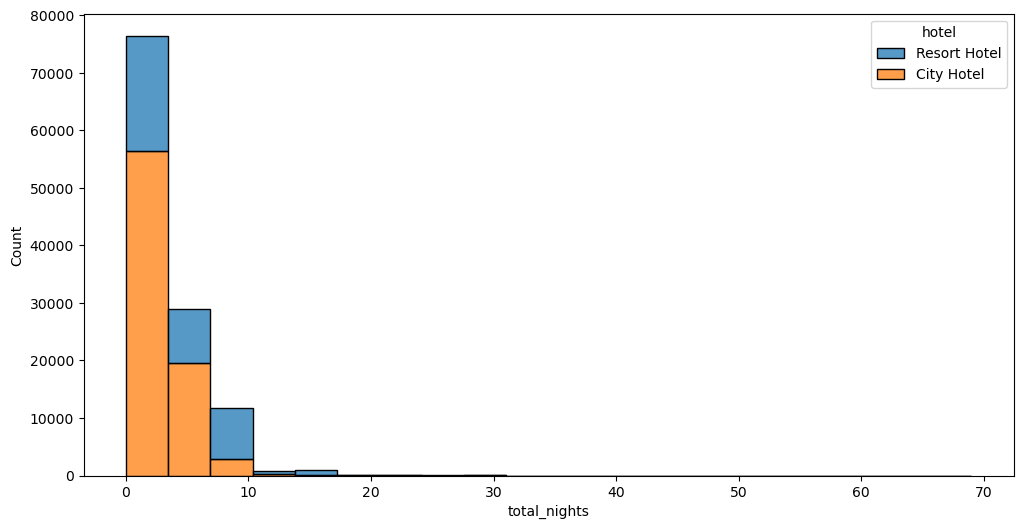

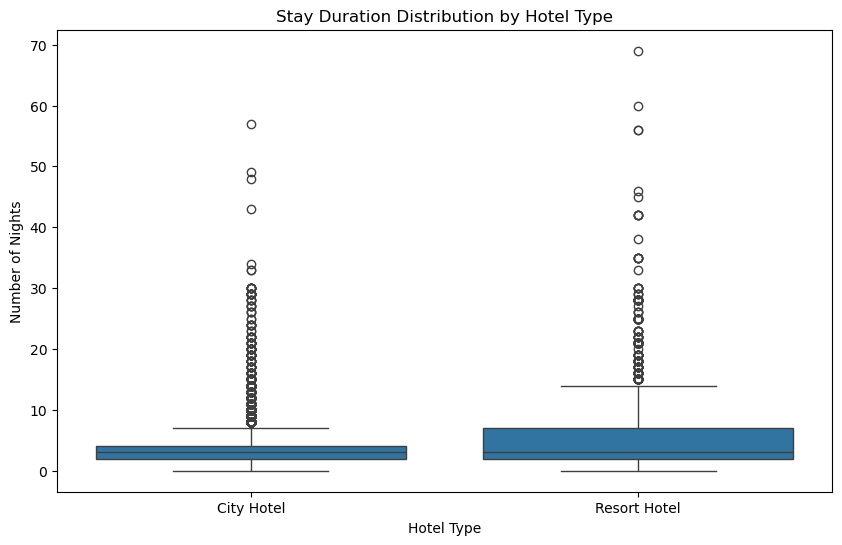

In [171]:
def plot_stay_duration_distribution(df):
    """Plot the distribution of stay durations by hotel type"""
    plt.figure(figsize=(12, 6))
    
    
    sns.histplot(data=df, 
                x='total_nights', 
                hue='hotel',
                multiple="stack", 
                bins=20,  # Light salmon for Resort, Light blue for City
                hue_order=['Resort Hotel', 'City Hotel']) 

def plot_stay_duration_boxplot(df):
    """Plot box plot of stay durations by hotel type"""
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='hotel', y='total_nights')
    plt.title('Stay Duration Distribution by Hotel Type')
    plt.xlabel('Hotel Type')
    plt.ylabel('Number of Nights')
    plt.show()
    
plot_stay_duration_distribution(df_copy)
plot_stay_duration_boxplot(df_copy)

### Analysis
#### Distribution Shape
The data reveals a highly right-skewed (positively skewed) distribution, with a strong concentration of short stays ranging from 0-3 nights. The distribution shows a long tail extending to approximately 20 nights, though there are very few stays that extend beyond this duration.
#### Pattern Recognition
Analysis shows a clear dominance of short-duration stays across the dataset. The data follows an exponential decay pattern in stay duration, with notable differences emerging between City and Resort hotels when examining the stacked color distributions.
#### Business Implications
The high turnover rate, evidenced by the predominance of short stays, suggests a need for highly efficient check-in and check-out processes. This pattern has significant implications for room cleaning and maintenance scheduling, while also presenting various opportunities for revenue optimization strategies.

## Average stay duration by month and hotel type

<Figure size 1200x600 with 0 Axes>

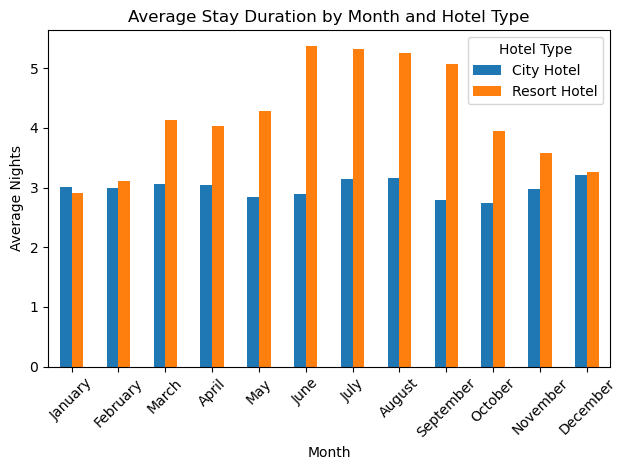

<Figure size 1500x1000 with 0 Axes>

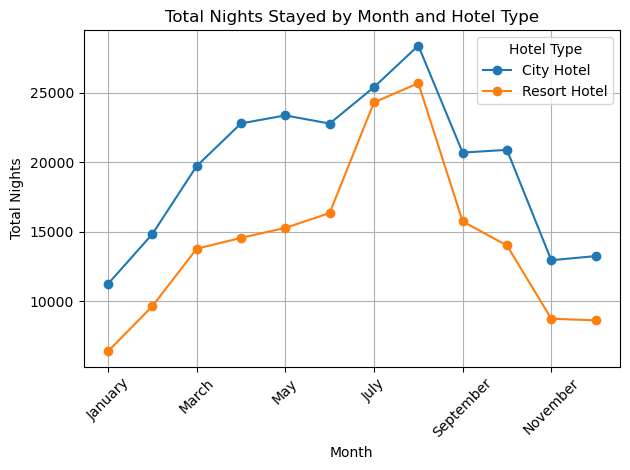

In [172]:
def plot_total_nights_by_month(df):
    """Plot total nights stayed by month and hotel type"""
    plt.figure(figsize=(15, 10))
    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    total_nights_by_hotel = df.groupby(['arrival_date_month', 'hotel'])['total_nights'].sum().unstack()
    total_nights_by_hotel = total_nights_by_hotel.reindex(month_order)
    total_nights_by_hotel.plot(kind='line', marker='o')
    plt.title('Total Nights Stayed by Month and Hotel Type')
    plt.xlabel('Month')
    plt.ylabel('Total Nights')
    plt.xticks(rotation=45)
    plt.legend(title='Hotel Type')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_monthly_average_stays(df):
    """Plot average stay duration by month and hotel type"""
    plt.figure(figsize=(12, 6))
    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    monthly_avg = df.groupby(['arrival_date_month', 'hotel'])['total_nights'].mean().unstack()
    monthly_avg = monthly_avg.reindex(month_order)
    monthly_avg.plot(kind='bar')
    plt.title('Average Stay Duration by Month and Hotel Type')
    plt.xlabel('Month')
    plt.ylabel('Average Nights')
    plt.xticks(rotation=45)
    plt.legend(title='Hotel Type')
    plt.tight_layout()
    plt.show()
plot_monthly_average_stays(df_copy)
plot_total_nights_by_month(df_copy)

### Seasonal Patterns

#### Peak Season (June-August)
- **City Hotels**
  * Highest total nights (~28,000 nights in August)
  * Consistent average stay duration (~3 nights)
  * Strong business performance despite shorter stays

- **Resort Hotels**
  * Peak total nights (~25,000 in July)
  * Longest average stays (~5.3 nights)
  * Clear summer vacation pattern

#### Off-Peak Season (November-January)
- **City Hotels**
  * Lowest total nights (~13,000)
  * Stable average duration (~3 nights)
  * Maintains business consistency

- **Resort Hotels**
  * Minimum total nights (~7,000)
  * Shorter average stays (~3 nights)
  * Converges with city hotel patterns

### Key Trends

#### Total Nights Pattern
1. **Seasonal Variation**
   * Both types show strong seasonality
   * City hotels consistently higher volume
   * Resort hotels show more dramatic fluctuation

2. **Volume Leadership**
   * City hotels maintain higher total nights year-round
   * Gap narrows significantly in summer months
   * Maximum difference in winter months

#### Stay Duration Insights
1. **City Hotels**
   * Remarkably stable duration (~2.8-3.2 nights)
   * Minimal seasonal impact on stay length
   * Suggests consistent business travel base

2. **Resort Hotels**
   * High seasonal variation in duration
   * Summer stays almost double winter stays
   * Clear leisure travel pattern

### Business Implications

#### Revenue Optimization
1. **City Hotels**
   * Focus on volume in peak seasons
   * Maintain consistent pricing strategy
   * Target business travelers year-round

2. **Resort Hotels**
   * Aggressive summer premium pricing
   * Winter package deals to increase stays
   * Focus on extending shoulder season stays



### Strategic Recommendations
1. Target shoulder seasons for growth
2. Develop season-specific pricing strategies
3. Optimize operational efficiency based on stay patterns
4. Create targeted marketing campaigns by season

## Comparison of weekend vs weekday stays

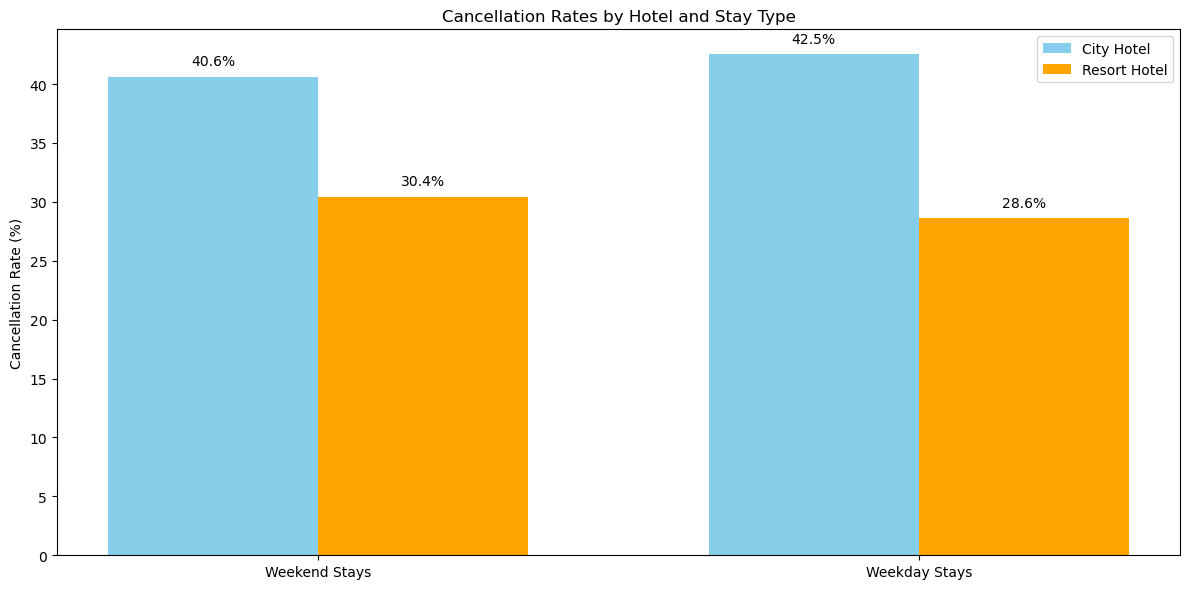


City Hotel:
Weekend Cancellation Rate: 40.6%
Weekday Cancellation Rate: 42.5%
Total Weekend Bookings: 41513
Total Weekday Bookings: 74367

Resort Hotel:
Weekend Cancellation Rate: 30.4%
Weekday Cancellation Rate: 28.6%
Total Weekend Bookings: 25879
Total Weekday Bookings: 37378


In [173]:
def plot_cancellation_rates_by_hotel(df):
    """
    Create a single plot showing cancellation rates by hotel type and stay type
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing hotel booking data
    """
    # Initialize figure
    plt.figure(figsize=(12, 6))
    
    # Calculate cancellation rates for each hotel type
    hotel_cancellation_rates = {}
    
    for hotel_type in df['hotel'].unique():
        hotel_data = df[df['hotel'] == hotel_type]
        
        weekend_stays = hotel_data[hotel_data['stays_in_weekend_nights'] > 0]
        weekday_stays = hotel_data[hotel_data['stays_in_week_nights'] > 0]
        
        hotel_cancellation_rates[hotel_type] = {
            'Weekend': (weekend_stays['is_canceled'].mean() * 100),
            'Weekday': (weekday_stays['is_canceled'].mean() * 100)
        }
    
    # Set up bar positions
    x = np.arange(2)
    width = 0.35
    
    # Create bars
    plt.bar(x - width/2, 
            [hotel_cancellation_rates['City Hotel']['Weekend'],
             hotel_cancellation_rates['City Hotel']['Weekday']],
            width, 
            label='City Hotel',
            color='skyblue')
    
    plt.bar(x + width/2,
            [hotel_cancellation_rates['Resort Hotel']['Weekend'],
             hotel_cancellation_rates['Resort Hotel']['Weekday']],
            width,
            label='Resort Hotel',
            color='orange')
    
    # Customize plot
    plt.ylabel('Cancellation Rate (%)')
    plt.title('Cancellation Rates by Hotel and Stay Type')
    plt.xticks(x, ['Weekend Stays', 'Weekday Stays'])
    plt.legend()
    
    # Add percentage labels on bars
    for i, hotel_type in enumerate(['City Hotel', 'Resort Hotel']):
        for j, stay_type in enumerate(['Weekend', 'Weekday']):
            value = hotel_cancellation_rates[hotel_type][stay_type]
            plt.text(j + (width if i else -width)/2, value + 1,
                    f'{value:.1f}%',
                    ha='center')
    
    plt.tight_layout()
    
    # Return statistics
    stats = {
        'Cancellation Rates': hotel_cancellation_rates,
        'Total Bookings': {
            'City Hotel': {
                'Weekend': len(df[(df['hotel'] == 'City Hotel') & 
                                (df['stays_in_weekend_nights'] > 0)]),
                'Weekday': len(df[(df['hotel'] == 'City Hotel') & 
                                 (df['stays_in_week_nights'] > 0)])
            },
            'Resort Hotel': {
                'Weekend': len(df[(df['hotel'] == 'Resort Hotel') & 
                                (df['stays_in_weekend_nights'] > 0)]),
                'Weekday': len(df[(df['hotel'] == 'Resort Hotel') & 
                                 (df['stays_in_week_nights'] > 0)])
            }
        }
    }
    
    return stats

# Example usage:
stats = plot_cancellation_rates_by_hotel(df)
plt.show()

# Print summary
for hotel in ['City Hotel', 'Resort Hotel']:
    print(f"\n{hotel}:")
    print(f"Weekend Cancellation Rate: {stats['Cancellation Rates'][hotel]['Weekend']:.1f}%")
    print(f"Weekday Cancellation Rate: {stats['Cancellation Rates'][hotel]['Weekday']:.1f}%")
    print(f"Total Weekend Bookings: {stats['Total Bookings'][hotel]['Weekend']}")
    print(f"Total Weekday Bookings: {stats['Total Bookings'][hotel]['Weekday']}")

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_simple_cancellation_rates(df):
    """
    Create a simple bar plot showing cancellation rates by stay type
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing hotel booking data
    """
    # Calculate cancellation rates
    weekend_stays = df[df['stays_in_weekend_nights'] > 0]
    weekday_stays = df[df['stays_in_week_nights'] > 0]
    
    cancellation_rates = {
        'Weekend': (weekend_stays['is_canceled'].mean() * 100),
        'Weekday': (weekday_stays['is_canceled'].mean() * 100)
    }
    
    # Create plot
    plt.figure(figsize=(10, 6))
    bars = plt.bar(['Weekend Stays', 'Weekday Stays'],
                  [cancellation_rates['Weekend'], cancellation_rates['Weekday']],
                  color=['lightblue', 'orange'])
    
    # Customize plot
    plt.ylabel('Cancellation Rate (%)')
    plt.title('Cancellation Rates by Stay Type')
    
    # Add percentage labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,
                f'{height:.1f}%',
                ha='center', va='bottom')
    
    # Clean up layout
    plt.tight_layout()
    
    return cancellation_rates

def analyze_cancellations_by_hotel_and_day(df):
    """
    Analyze and visualize booking cancellations by hotel type for weekend vs weekday nights
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing hotel booking data
    
    Returns:
    tuple: (figure, cancellation_stats)
    """
    # Calculate total nights for each booking
    df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
    
    # Create statistics dictionary for each hotel type
    stats = {}
    for hotel_type in df['hotel'].unique():
        hotel_data = df[df['hotel'] == hotel_type]
        
        cancelled = hotel_data[hotel_data['is_canceled'] == True]
        not_cancelled = hotel_data[hotel_data['is_canceled'] == False]
        
        stats[hotel_type] = {
            'Cancelled': {
                'Weekend': cancelled['stays_in_weekend_nights'].mean(),
                'Weekday': cancelled['stays_in_week_nights'].mean(),
                'Total': len(cancelled)
            },
            'Not Cancelled': {
                'Weekend': not_cancelled['stays_in_weekend_nights'].mean(),
                'Weekday': not_cancelled['stays_in_week_nights'].mean(),
                'Total': len(not_cancelled)
            }
        }
    
    # Create visualization with subplots
    fig = plt.figure(figsize=(20, 10))
    gs = fig.add_gridspec(2, 2)
    
    # Plot 1: Average nights comparison for City Hotel
    ax1 = fig.add_subplot(gs[0, 0])
    width = 0.35
    x = np.arange(2)
    
    ax1.bar(x - width/2, 
            [stats['City Hotel']['Cancelled']['Weekend'], 
             stats['City Hotel']['Cancelled']['Weekday']], 
            width, label='Cancelled', color='red', alpha=0.6)
    ax1.bar(x + width/2, 
            [stats['City Hotel']['Not Cancelled']['Weekend'], 
             stats['City Hotel']['Not Cancelled']['Weekday']], 
            width, label='Not Cancelled', color='green', alpha=0.6)
    
    ax1.set_xticks(x)
    ax1.set_xticklabels(['Weekend Nights', 'Weekday Nights'])
    ax1.set_ylabel('Average Nights')
    ax1.set_title('City Hotel: Average Stay Duration')
    ax1.legend()
    
    # Plot 2: Average nights comparison for Resort Hotel
    ax2 = fig.add_subplot(gs[0, 1])
    
    ax2.bar(x - width/2, 
            [stats['Resort Hotel']['Cancelled']['Weekend'], 
             stats['Resort Hotel']['Cancelled']['Weekday']], 
            width, label='Cancelled', color='red', alpha=0.6)
    ax2.bar(x + width/2, 
            [stats['Resort Hotel']['Not Cancelled']['Weekend'], 
             stats['Resort Hotel']['Not Cancelled']['Weekday']], 
            width, label='Not Cancelled', color='green', alpha=0.6)
    
    ax2.set_xticks(x)
    ax2.set_xticklabels(['Weekend Nights', 'Weekday Nights'])
    ax2.set_ylabel('Average Nights')
    ax2.set_title('Resort Hotel: Average Stay Duration')
    ax2.legend()
    
    # Plot 3: Cancellation rates comparison
    ax3 = fig.add_subplot(gs[1, :])
    
    cancellation_rates = {}
    for hotel_type in ['City Hotel', 'Resort Hotel']:
        hotel_data = df[df['hotel'] == hotel_type]
        weekend_stays = hotel_data[hotel_data['stays_in_weekend_nights'] > 0]
        weekday_stays = hotel_data[hotel_data['stays_in_week_nights'] > 0]
        
        cancellation_rates[hotel_type] = {
            'Weekend': (weekend_stays['is_canceled'].mean() * 100),
            'Weekday': (weekday_stays['is_canceled'].mean() * 100)
        }
    
    # Create grouped bar chart for cancellation rates
    x = np.arange(2)
    width = 0.35
    
    ax3.bar(x - width/2, 
            [cancellation_rates['City Hotel']['Weekend'], 
             cancellation_rates['City Hotel']['Weekday']], 
            width, label='City Hotel', color='skyblue')
    ax3.bar(x + width/2, 
            [cancellation_rates['Resort Hotel']['Weekend'], 
             cancellation_rates['Resort Hotel']['Weekday']], 
            width, label='Resort Hotel', color='orange')
    
    ax3.set_xticks(x)
    ax3.set_xticklabels(['Weekend Stays', 'Weekday Stays'])
    ax3.set_ylabel('Cancellation Rate (%)')
    ax3.set_title('Cancellation Rates by Hotel Type and Stay Type')
    ax3.legend()
    
    # Add percentage labels
    for i, hotel_type in enumerate(['City Hotel', 'Resort Hotel']):
        for j, stay_type in enumerate(['Weekend', 'Weekday']):
            value = cancellation_rates[hotel_type][stay_type]
            ax3.text(j + (width if i else -width)/2, value + 1, 
                    f'{value:.1f}%', ha='center')
    
    plt.tight_layout()
    
    # Compile detailed statistics
    detailed_stats = {
        'Average Nights': stats,
        'Cancellation Rates': cancellation_rates,
        'Total Bookings': {
            'City Hotel': len(df[df['hotel'] == 'City Hotel']),
            'Resort Hotel': len(df[df['hotel'] == 'Resort Hotel'])
        }
    }
    
    return fig, detailed_stats

<Figure size 1000x600 with 0 Axes>

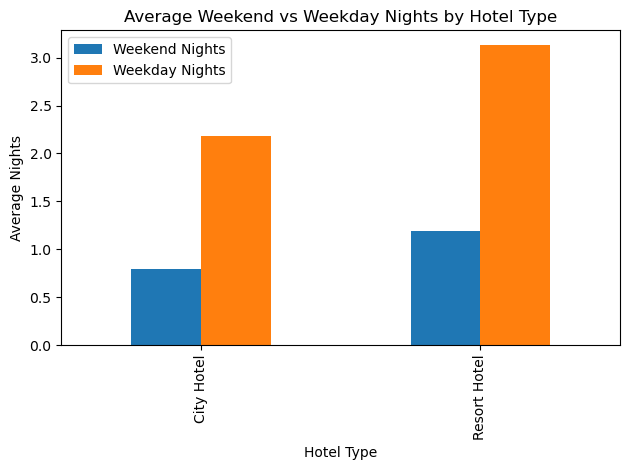

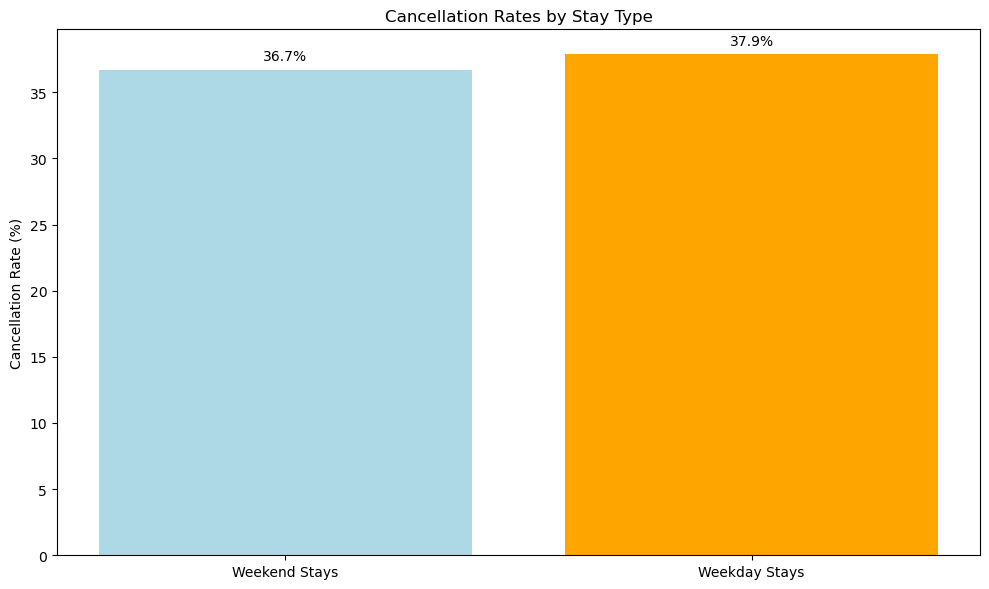

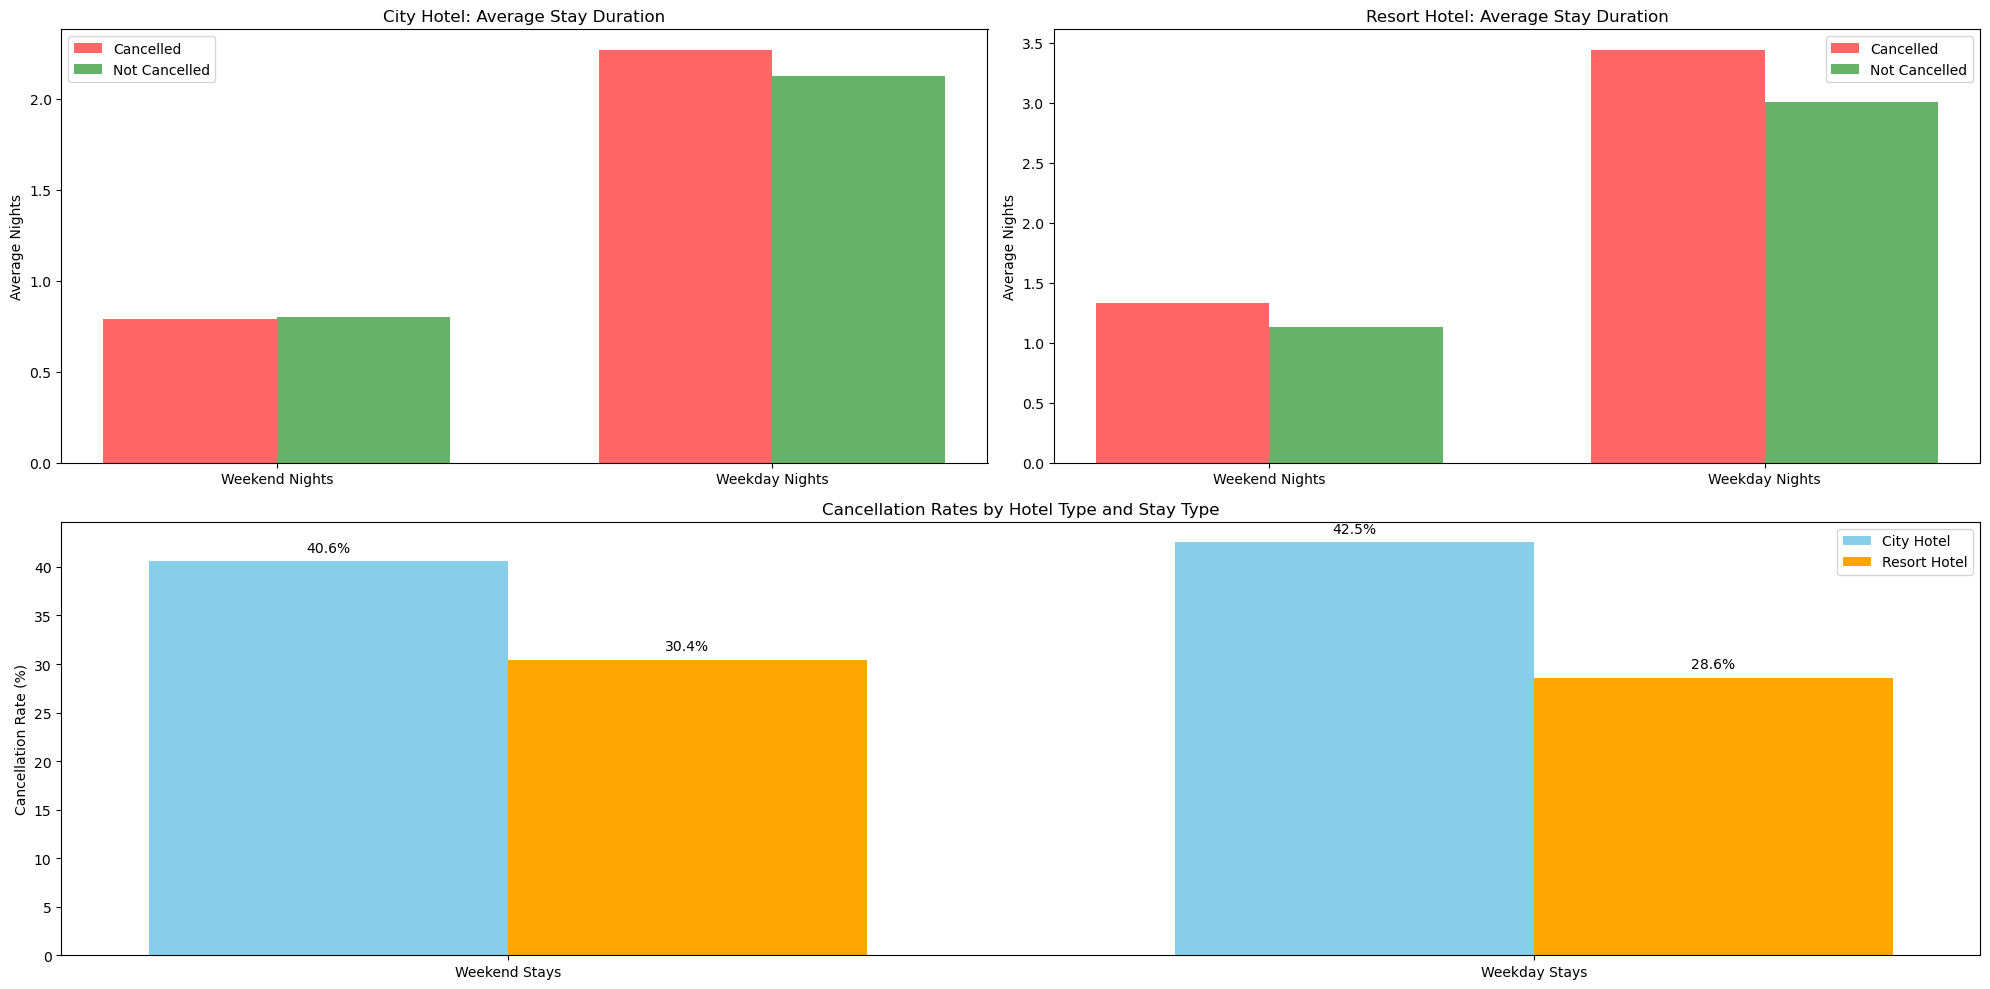


Cancellation Statistics by Hotel Type:

City Hotel:
Weekend Stays Cancellation Rate: 40.6%
Weekday Stays Cancellation Rate: 42.5%
Total Bookings: 79330

Resort Hotel:
Weekend Stays Cancellation Rate: 30.4%
Weekday Stays Cancellation Rate: 28.6%
Total Bookings: 40060


In [175]:
def plot_weekend_weekday_comparison(df):
    """Plot comparison of weekend vs weekday stays"""
    plt.figure(figsize=(10, 6))
    weekend_weekday = df.groupby('hotel').agg({
        'stays_in_weekend_nights': 'mean',
        'stays_in_week_nights': 'mean'
    })
    weekend_weekday.plot(kind='bar')
    plt.title('Average Weekend vs Weekday Nights by Hotel Type')
    plt.xlabel('Hotel Type')
    plt.ylabel('Average Nights')
    plt.legend(['Weekend Nights', 'Weekday Nights'])
    plt.tight_layout()
    plt.show()

plot_weekend_weekday_comparison(df_copy)
fig, stats = plot_simple_cancellation_rates(df_copy)
plt.show()
fig, stats = analyze_cancellations_by_hotel_and_day(df_copy)
plt.show()

print("\nCancellation Statistics by Hotel Type:")
for hotel_type in ['City Hotel', 'Resort Hotel']:
    print(f"\n{hotel_type}:")
    print(f"Weekend Stays Cancellation Rate: {stats['Cancellation Rates'][hotel_type]['Weekend']:.1f}%")
    print(f"Weekday Stays Cancellation Rate: {stats['Cancellation Rates'][hotel_type]['Weekday']:.1f}%")
    print(f"Total Bookings: {stats['Total Bookings'][hotel_type]}")

### Hotel stay analysis for weekdays vs weekends
#### City Hotels
- Lower average stay duration overall
- Weekend nights: ~0.8 nights average
- Weekday nights: ~2.2 nights average
- Clear preference for weekday stays (2.75x higher than weekends)

#### Resort Hotels
- Higher average stay duration compared to city hotels
- Weekend nights: ~1.2 nights average
- Weekday nights: ~3.1 nights average
- Strongest weekday preference (2.6x higher than weekends)

### Cancellation Analysis

#### Overall Patterns
- Weekday stays show slightly higher cancellation rates (37.9%) compared to weekend stays (36.7%)
- Minimal difference (~1.2%) between weekend and weekday cancellation rates
- Both types show significant cancellation rates >35%

#### Hotel-Specific Cancellation Patterns
1. **City Hotels**
   - Weekend cancellation rate: 40.6%
   - Weekday cancellation rate: 42.5%
   - Consistently higher cancellation rates than resort hotels
   - Higher volatility between cancelled and non-cancelled bookings

2. **Resort Hotels**
   - Weekend cancellation rate: 30.4%
   - Weekday cancellation rate: 28.6%
   - More stable cancellation pattern
   - Generally lower cancellation rates (~12% lower than city hotels)

### Key Business Insights

1. **Booking Stability**
   - Resort hotels demonstrate more stable booking patterns
   - City hotels face higher cancellation risk
   - Weekend bookings slightly more reliable overall

2. **Duration Strategy**
   - Both hotel types should focus on extending weekend stays
   - Resort hotels have better success with longer stays
   - Weekday stays dominate in terms of duration

3. **Risk Management**
   - City hotels should implement stronger cancellation policies
   - Focus on converting weekend bookings to longer stays
   - Consider different deposit requirements based on hotel type and stay duration

### Recommendations

1. **For City Hotels**
   - Implement stricter cancellation policies for weekday bookings
   - Develop weekend packages to increase duration
   - Consider loyalty programs to reduce cancellation rates

2. **For Resort Hotels**
   - Focus on maintaining lower cancellation rates
   - Develop extended stay promotions
   - Leverage successful weekday booking patterns

3. **General Strategies**
   - Differentiated pricing for weekend vs weekday stays
   - Length-of-stay incentives
   - targeted marketing based on stay patterns

In [176]:
def plot_total_nights_by_month(df):
    """Plot total nights stayed by month and hotel type"""
    plt.figure(figsize=(12, 6))
    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    total_nights_by_hotel = df.groupby(['arrival_date_month', 'hotel'])['total_nights'].sum().unstack()
    total_nights_by_hotel = total_nights_by_hotel.reindex(month_order)
    total_nights_by_hotel.plot(kind='line', marker='o')
    plt.title('Total Nights Stayed by Month and Hotel Type')
    plt.xlabel('Month')
    plt.ylabel('Total Nights')
    plt.xticks(rotation=45)
    plt.legend(title='Hotel Type')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Stay duration by Market segment, Customer types and room Types

In [177]:
def plot_stay_duration_by_market_segment(df):
    """Plot stay duration by market segment"""
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='market_segment', y='total_nights', hue='hotel')
    plt.title('Stay Duration by Market Segment')
    plt.xlabel('Market Segment')
    plt.ylabel('Number of Nights')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_stay_duration_by_customer_type(df):
    """Plot stay duration by customer type"""
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='customer_type', y='total_nights', hue='hotel')
    plt.title('Stay Duration by Customer Type')
    plt.xlabel('Customer Type')
    plt.ylabel('Number of Nights')
    plt.tight_layout()
    plt.show()

def plot_stay_duration_by_room_type(df):
    """Plot stay duration by room type"""
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='assigned_room_type', y='total_nights', hue='hotel')
    plt.title('Stay Duration by Room Type')
    plt.xlabel('Room Type')
    plt.ylabel('Number of Nights')
    plt.tight_layout()
    plt.show()

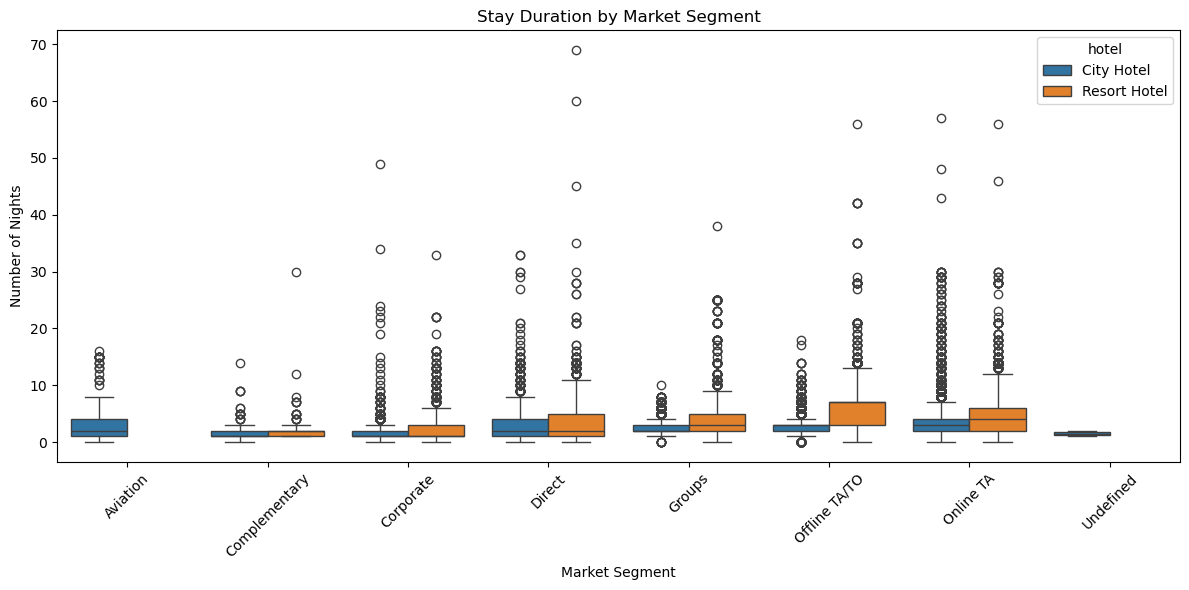

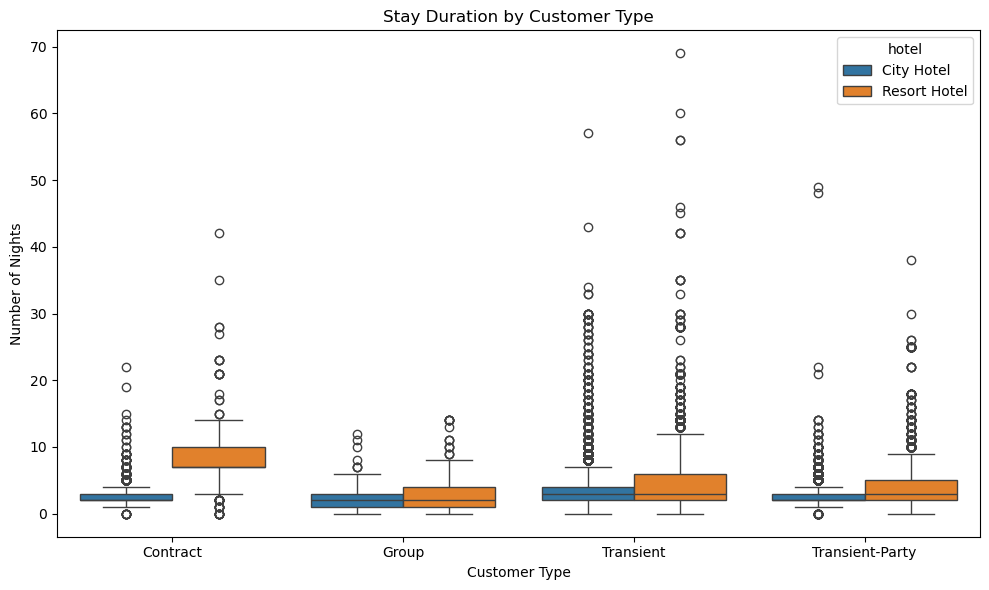

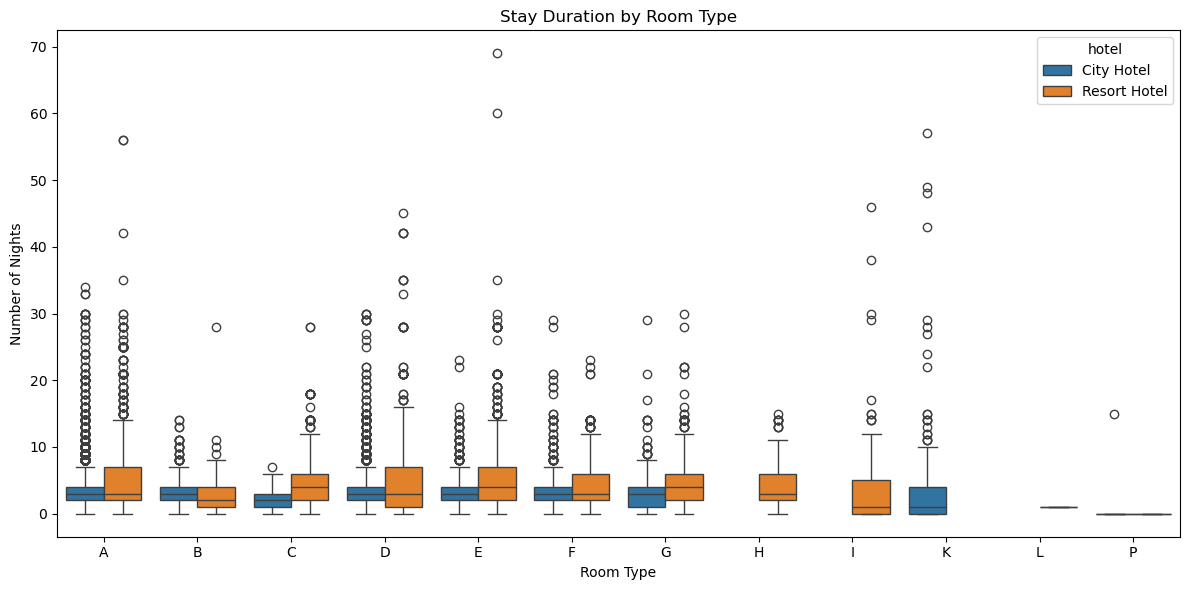

In [178]:
plot_stay_duration_by_market_segment(df_copy)
plot_stay_duration_by_customer_type(df_copy)
plot_stay_duration_by_room_type(df_copy)

### Market Segment Analysis

#### Online and Offline Travel Agencies (TA)
* Highest median stay duration for both hotel types
* Resort hotels show greater variance in stay length
* Online TA bookings typically longer than offline
* More outliers indicating extended stays (up to 60 nights)

#### Corporate and Direct Bookings
* More consistent stay durations
* City hotels show tighter distribution
* Direct bookings slightly longer than corporate
* Fewer extreme outliers

#### Aviation and Complementary
* Shortest average stays
* Limited variance in duration
* Minimal difference between hotel types
* Few outliers

### Customer Type Analysis

#### Contract Customers
* Resort hotels show significantly longer stays
* Highest median duration among all customer types
* Large variance in stay length
* Median stay ~8 nights for resort hotels

#### Transient Customers
* Most common customer type
* Similar patterns between city and resort hotels
* More outliers in resort hotels
* Median stay 2-3 nights

#### Group and Transient-Party
* Moderate stay durations
* Resort hotels show slightly longer stays
* More consistent patterns than contract customers
* Less variance in stay duration

### Room Type Patterns

#### Type A and D Rooms
* Most popular room types
* Highest number of bookings
* Greater variance in stay duration
* More outliers in both hotel types

#### Premium Rooms (B, C, F)
* Shorter average stays
* More consistent duration patterns
* Fewer extreme outliers
* Similar patterns across hotel types

#### Specialized Rooms (H, I, K)
* Limited availability in city hotels
* Resort-specific room types show unique patterns
* More variable stay durations
* Higher proportion of extended stays

### Business Implications

#### Marketing Strategy
1. **Target Segmentation**
   * Focus on Online TA for longer stays
   * Develop corporate packages for consistent occupancy
   * Special rates for contract customers in resort hotels

2. **Room Allocation**
   * Optimize Type A and D room inventory
   * Consider converting less popular room types
   * Balance premium room availability with demand

#### Operational Planning
1. **Resource Management**
   * Plan staffing based on customer type mix
   * Adjust housekeeping schedules for varying durations
   * Optimize room turnover processes

2. **Revenue Optimization**
   * Dynamic pricing by market segment
   * Length-of-stay incentives for preferred segments
   * Premium pricing for high-demand room types


## Lead time vs Stay Duration

In [179]:
def analyze_lead_time_stay_patterns(df, figsize=(12, 8)):
    """
    Create a detailed heatmap analysis of lead time vs stay duration patterns.
    
    Parameters:
    -----------
    df : DataFrame
    figsize : tuple
    """
    
    if 'total_nights' not in df.columns:
        df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
    
    df['lead_time_cat'] = pd.cut(df['lead_time'], 
                                bins=[0, 7, 30, 90, 180, 365, float('inf')],
                                labels=['1 week', '1 month', '3 months', 
                                       '6 months', '1 year', '>1 year'])
    
    df['stay_duration_cat'] = pd.cut(df['total_nights'],
                                   bins=[0, 2, 4, 7, 14, float('inf')],
                                   labels=['1-2 nights', '3-4 nights', '5-7 nights',
                                          '8-14 nights', '15+ nights'])
    
    
    lead_time_corr = pd.crosstab(df['lead_time_cat'], df['stay_duration_cat'])
    
    # Create heatmap
    # plt.figure(figsize=figsize)
    sns.heatmap(lead_time_corr,
                annot=True,
                fmt='d',
                cmap='YlOrRd',
                cbar_kws={'label': 'Number of Bookings'})
    plt.title('Stay Duration by Lead Time', pad=20)
    plt.xlabel('Stay Duration')
    plt.ylabel('Lead Time')
    plt.tight_layout()
    plt.show()

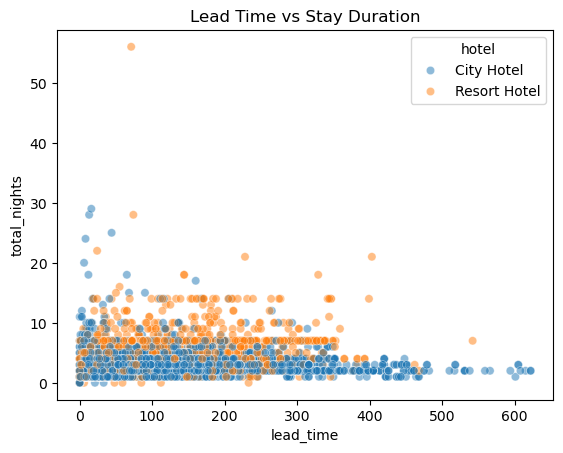

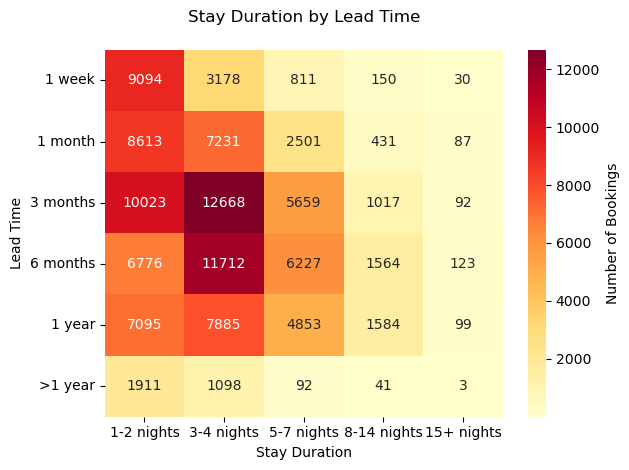

In [180]:
def lead_time_vs_stay_duration(df):
    sns.scatterplot(data=df.sample(5000), x='lead_time', y='total_nights', 
                    hue='hotel', alpha=0.5)
    plt.title('Lead Time vs Stay Duration')
    plt.show()
lead_time_vs_stay_duration(df_copy)
analyze_lead_time_stay_patterns(df_copy)

### General Pattern


- Most bookings concentrate in the shorter stay duration range (1-5 nights)
- Lead times spread from immediate (0 days) to approximately 600 days in advance
- The pattern forms a dense cluster at the bottom of the plot, showing that shorter stays are most common regardless of lead time


### Hotel Type Differences


- City Hotels (blue dots) show more concentration in shorter stays
- Resort Hotels (orange dots) have more scattered points in longer stay durations
- Resort Hotels appear to have more longer-duration bookings (10+ nights)


### Lead Time Patterns


- Short stays (1-5 nights) occur across all lead times
- Longer stays (>10 nights) tend to have more varied lead times
- Very long stays (>20 nights) are rare and appear sporadically


### Notable Insights


- No strong linear relationship between lead time and stay duration
- Maximum stay duration appears to be around 30 nights
- Both hotel types show similar patterns in short-term bookings
- Resort Hotels have slightly more extended-stay bookings with longer lead times

## No. of Special Requests vs Stay Duration

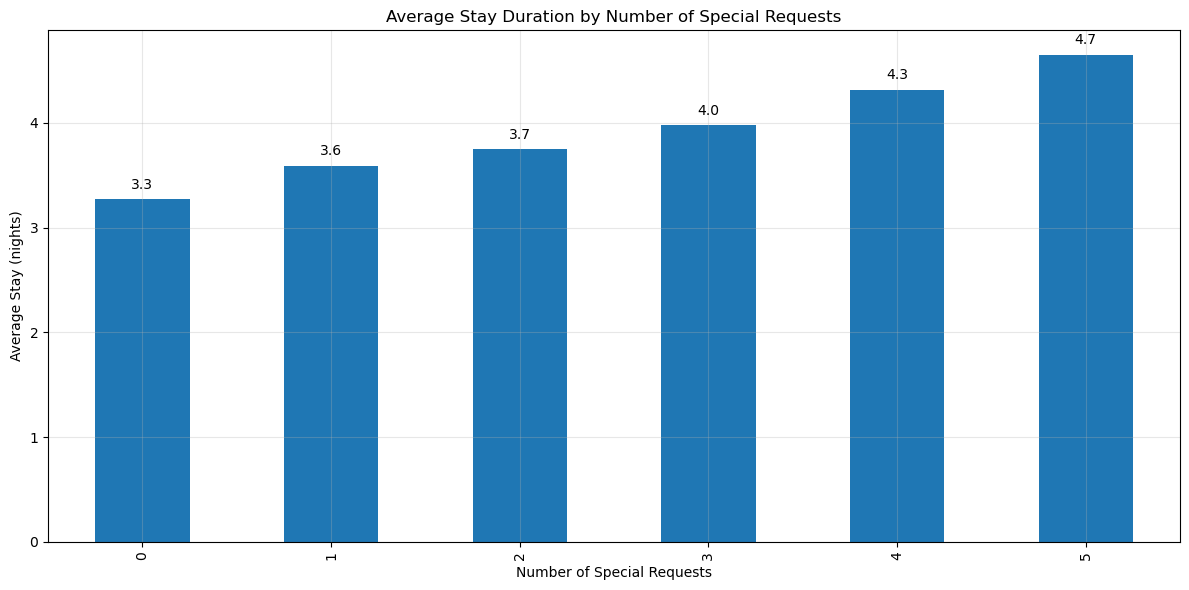

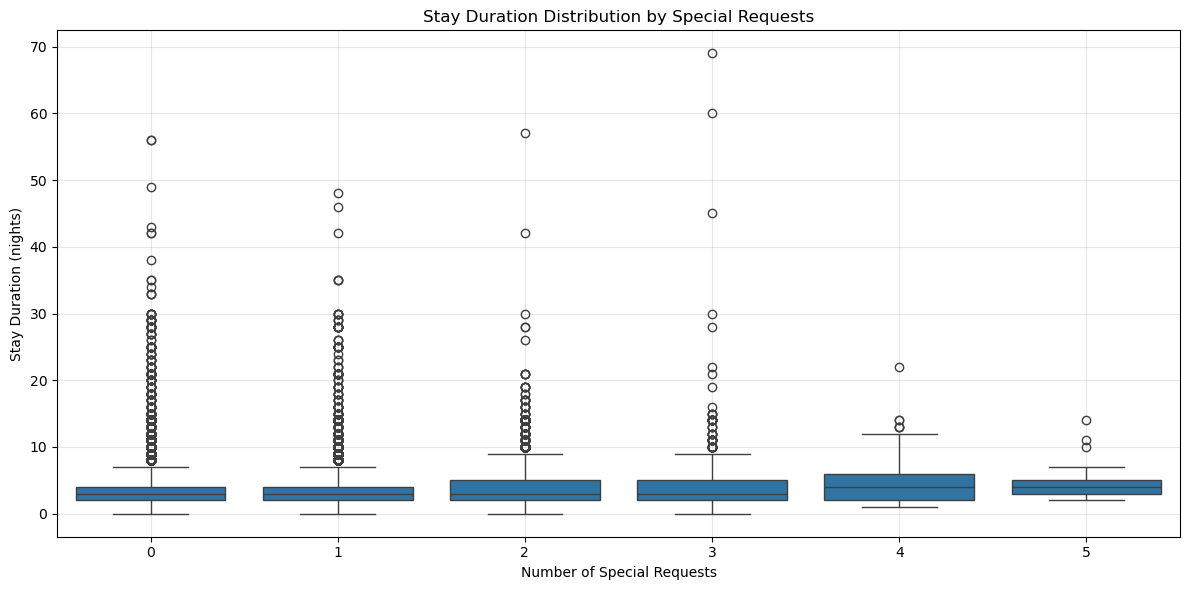

In [181]:
def analyze_stay_duration_requests(df):
    """
    Analyze stay duration vs special requests with two focused visualizations
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing hotel booking data
    """
    # Calculate total stay duration if not already present
    df['total_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
    
    # 1. Average stay duration plot
    plt.figure(figsize=(12, 6))
    avg_stay_by_requests = df.groupby('total_of_special_requests')['total_stay'].mean()
    avg_stay_by_requests.plot(kind='bar')
    plt.title('Average Stay Duration by Number of Special Requests', fontsize=12)
    plt.xlabel('Number of Special Requests', fontsize=10)
    plt.ylabel('Average Stay (nights)', fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # Add value labels on top of each bar
    for i, v in enumerate(avg_stay_by_requests):
        plt.text(i, v + 0.1, f'{v:.1f}', ha='center')
    
    plt.tight_layout()
    plt.show()
    
    # 2. Box plot distribution
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='total_of_special_requests', y='total_stay')
    plt.title('Stay Duration Distribution by Special Requests', fontsize=12)
    plt.xlabel('Number of Special Requests', fontsize=10)
    plt.ylabel('Stay Duration (nights)', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    


analyze_stay_duration_requests(df_copy)

In [182]:
def analyze_stay_duration_by_category(df, figsize=(10, 6), font_size=10):
    """
    Create separate correlation heatmaps for stay duration vs each category.
    
    Parameters:
    -----------
    df : pandas DataFrame
        The hotel bookings dataset
    figsize : tuple
        Size of each heatmap (width, height)
    font_size : int
        Base font size for the plots
    """
    
    # Ensure total_nights column exists
    if 'total_nights' not in df.columns:
        df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
    
    # Create dummy variables for each category
    categories = {
        'Market Segments': pd.get_dummies(df['market_segment'], prefix='market'),
        'Customer Types': pd.get_dummies(df['customer_type'], prefix='customer'),
        'Room Types': pd.get_dummies(df['assigned_room_type'], prefix='room')
    }
    
    # Create separate heatmaps for each category
    for category_name, dummies in categories.items():
        # Add total_nights to the dummy variables
        category_df = pd.concat([
            pd.DataFrame({'total_nights': df['total_nights']}),
            dummies
        ], axis=1)
        
        # Calculate correlation matrix
        correlation_matrix = category_df.corr()
        
        # Create figure
        plt.figure(figsize=figsize)
        
        # Create heatmap
        sns.heatmap(correlation_matrix, 
                   annot=True,
                   cmap='coolwarm',
                   center=0,
                   fmt='.2f',
                   square=True,
                   linewidths=0.5)
        
        # Customize plot
        plt.title(f'Stay Duration vs {category_name} Correlation', 
                 pad=20, 
                 fontsize=font_size + 2)
        
        # Rotate labels for better readability
        plt.xticks(rotation=45, ha='right', fontsize=font_size)
        plt.yticks(rotation=0, fontsize=font_size)
        
        # Adjust layout
        plt.tight_layout()
        plt.show()

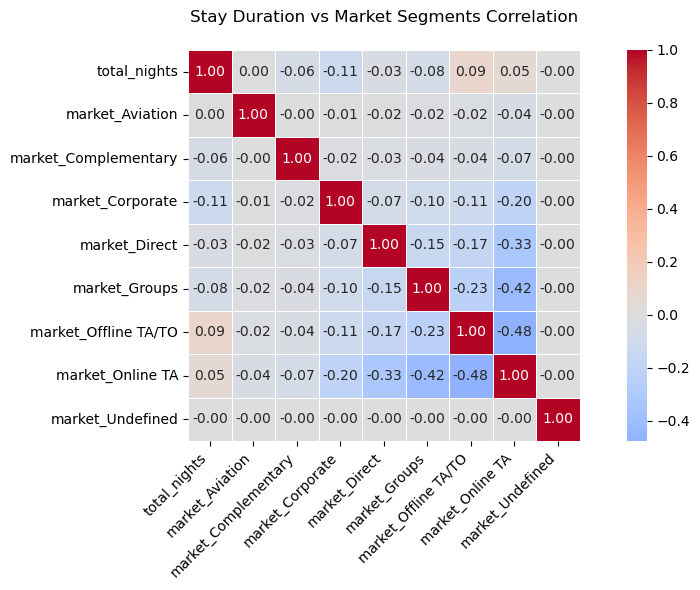

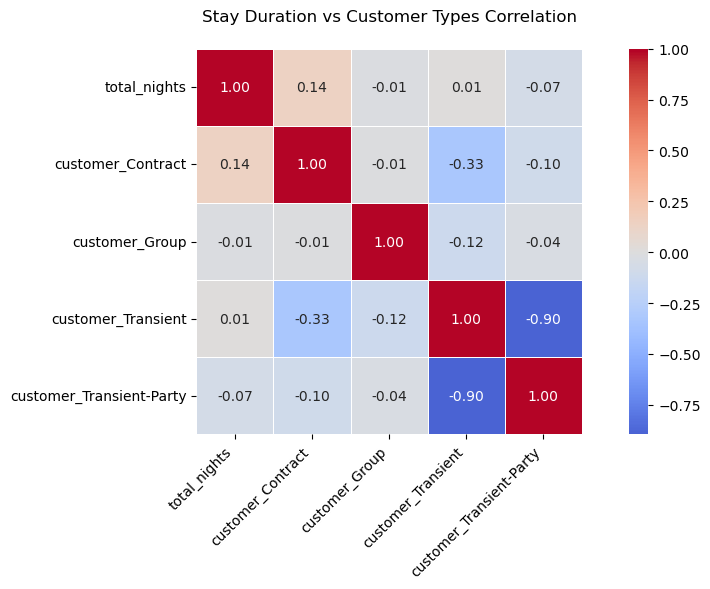

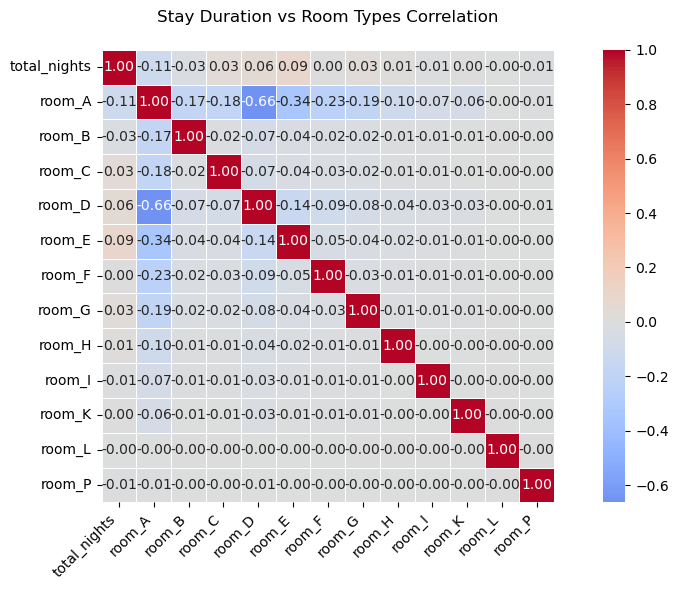

In [183]:
analyze_stay_duration_by_category(df_copy)

# Cancelation Analysis

### 1) Cancelation by Hotel type

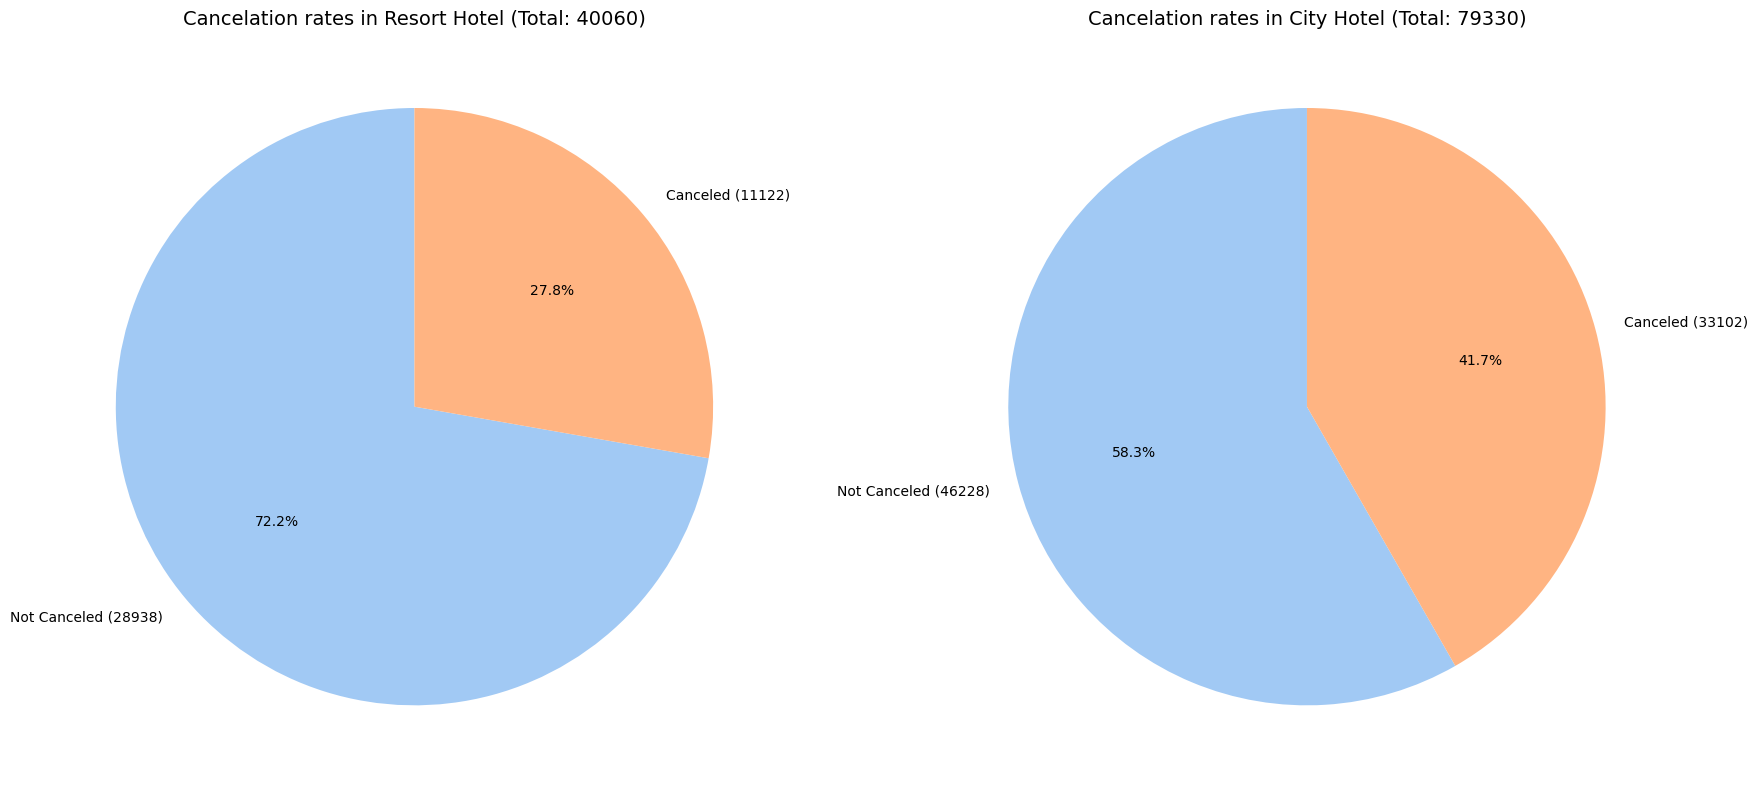

In [184]:
# Calculate the total counts for each hotel type
hotel_counts = df.groupby(['hotel', 'is_canceled']).size().unstack(fill_value=0)
hotel_totals = hotel_counts.sum(axis=1)

# Create two pie charts for Resort Hotel and City Hotel
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart for Resort Hotel
resort_data = hotel_counts.loc['Resort Hotel']
axes[0].pie(
    resort_data, 
    labels=[f"Not Canceled ({resort_data[0]})", f"Canceled ({resort_data[1]})"], 
    autopct=lambda p: f"{p:.1f}%",
    startangle=90, 
    colors=sns.color_palette("pastel"))
axes[0].set_title(f"Cancelation rates in Resort Hotel (Total: {hotel_totals['Resort Hotel']})", fontsize=14)

# Pie chart for City Hotel
city_data = hotel_counts.loc['City Hotel']
axes[1].pie(
    city_data, 
    labels=[f"Not Canceled ({city_data[0]})", f"Canceled ({city_data[1]})"], 
    autopct=lambda p: f"{p:.1f}%",
    startangle=90, 
    colors=sns.color_palette("pastel"))
axes[1].set_title(f"Cancelation rates in City Hotel (Total: {hotel_totals['City Hotel']})", fontsize=14)

plt.tight_layout()
plt.show()

### 2) Cancelation by Month

<Figure size 1400x800 with 0 Axes>

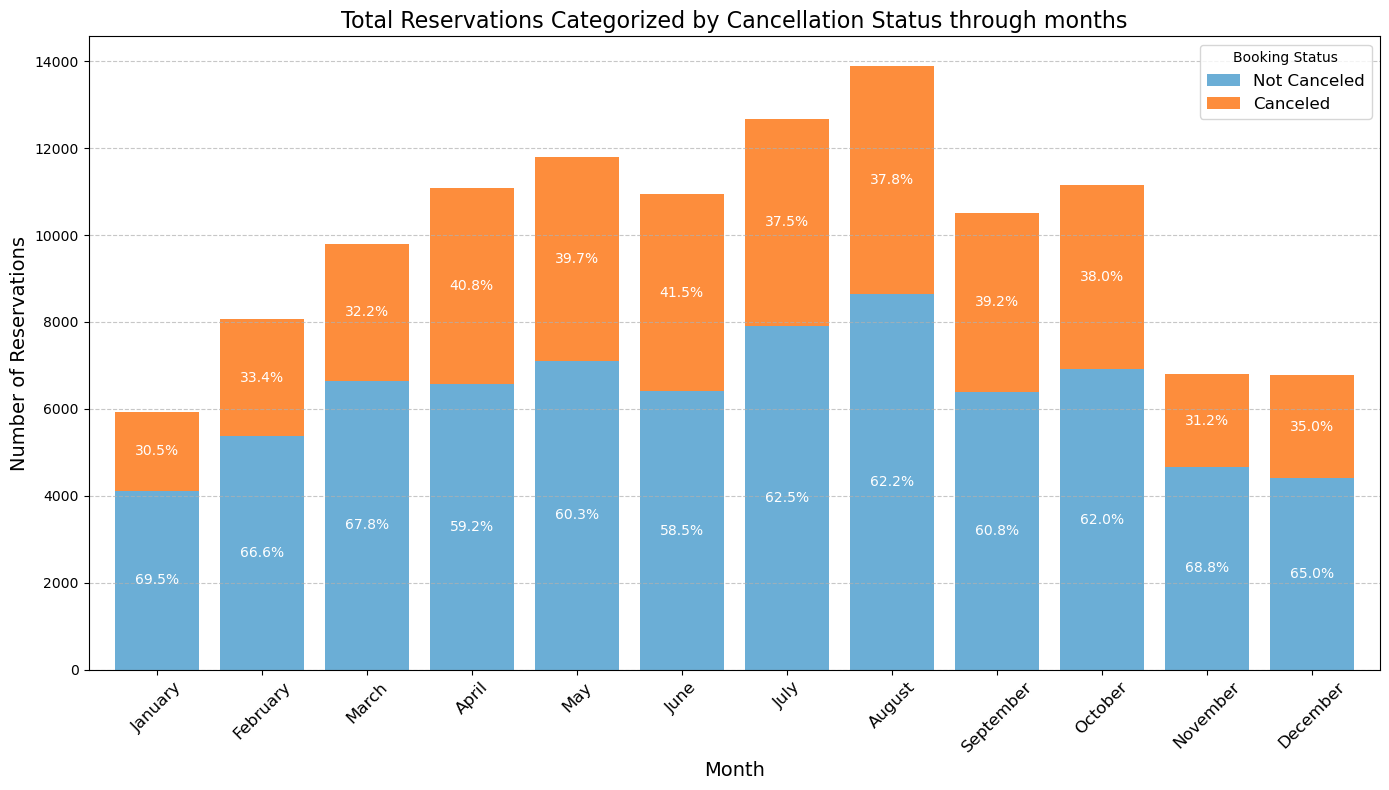

In [185]:
# Order months
months_order = ["January", "February", "March", "April", "May", "June",
                "July", "August", "September", "October", "November", "December"]

# Group data by month and cancellation status
monthly_data = df.groupby(['arrival_date_month', 'is_canceled']).size().unstack(fill_value=0).reindex(months_order)

# Normalize data to percentages
monthly_percent = monthly_data.div(monthly_data.sum(axis=1), axis=0) * 100

# Plot a stacked bar chart
plt.figure(figsize=(14, 8))
monthly_data.plot(kind='bar', stacked=True, width=0.8, color=['#6baed6', '#fd8d3c'], figsize=(14, 8))

# Adding labels and title
plt.title("Total Reservations Categorized by Cancellation Status through months", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Reservations", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(["Not Canceled", "Canceled"], title="Booking Status", fontsize=12)

# Add percentage labels on the bars
for i, (index, row) in enumerate(monthly_percent.iterrows()):
    for j, value in enumerate(row):
        if value > 0:  # Avoid plotting percentages for 0
            plt.text(
                i, 
                monthly_data.iloc[i].cumsum()[j] - (monthly_data.iloc[i, j] / 2), 
                f"{value:.1f}%", 
                ha="center", 
                va="center", 
                color="white", 
                fontsize=10
            )

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 3) Cancelation by Lead Time

<Figure size 1200x600 with 0 Axes>

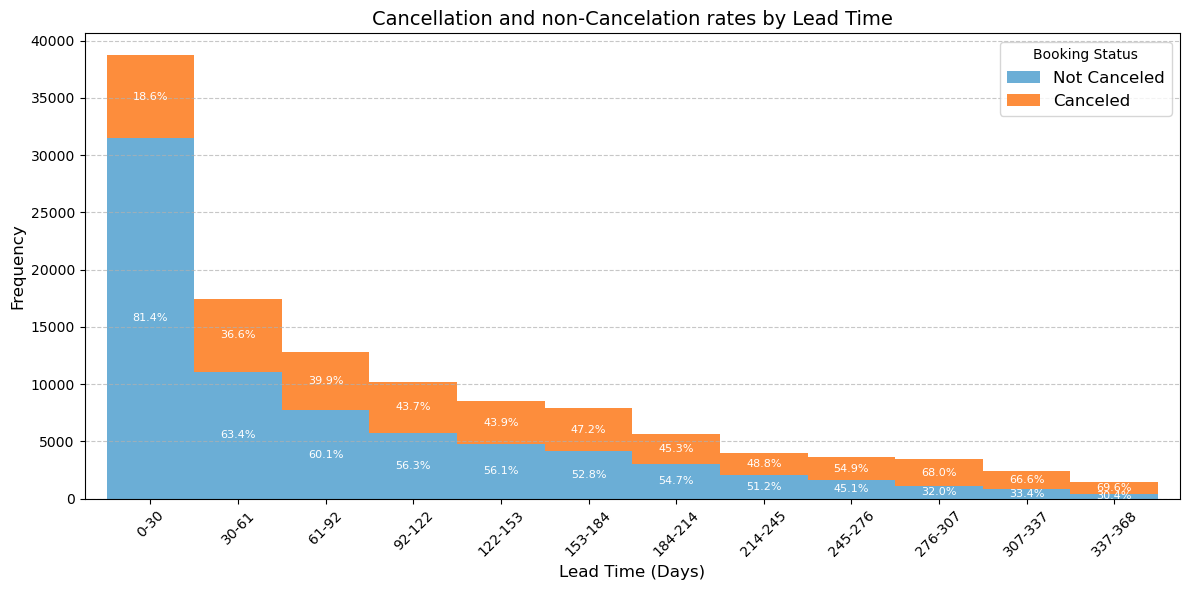

In [186]:
# Define the bins for lead time
bins = 24
bin_edges = np.histogram_bin_edges(df['lead_time'], bins=bins)

# Calculate the histogram counts for each category
hist_data = pd.DataFrame({
    'Not Canceled': np.histogram(df[df['is_canceled'] == 0]['lead_time'], bins=bin_edges)[0],
    'Canceled': np.histogram(df[df['is_canceled'] == 1]['lead_time'], bins=bin_edges)[0]
}, index=pd.IntervalIndex.from_breaks(bin_edges, closed='left'))

# Normalize to percentages
hist_percent = hist_data.div(hist_data.sum(axis=1), axis=0) * 100

# Filter out bins with fewer than 1000 total data points
valid_bins = hist_data.sum(axis=1) >= 1000
filtered_hist_data = hist_data[valid_bins]
filtered_hist_percent = hist_percent[valid_bins]

# Plot the histogram
plt.figure(figsize=(12, 6))
ax = filtered_hist_data.plot(kind='bar', stacked=True, color=['#6baed6', '#fd8d3c'], figsize=(12, 6), width=1)

# Add percentage labels for bins with sufficient data
for i, (index, row) in enumerate(filtered_hist_percent.iterrows()):
    for j, value in enumerate(row):
        if value > 0:  # Avoid plotting percentages for 0
            plt.text(
                i, 
                filtered_hist_data.iloc[i].cumsum()[j] - (filtered_hist_data.iloc[i, j] / 2), 
                f"{value:.1f}%", 
                ha="center", 
                va="center", 
                color="white", 
                fontsize=8  # Smaller font size
            )

# Customize plot
plt.title("Cancellation and non-Cancelation rates by Lead Time", fontsize=14)
plt.xlabel("Lead Time (Days)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(["Not Canceled", "Canceled"], title="Booking Status", fontsize=12)
plt.xticks(
    ticks=range(len(filtered_hist_data)), 
    labels=[f"{int(interval.left)}-{int(interval.right)}" for interval in filtered_hist_data.index], 
    rotation=45
)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


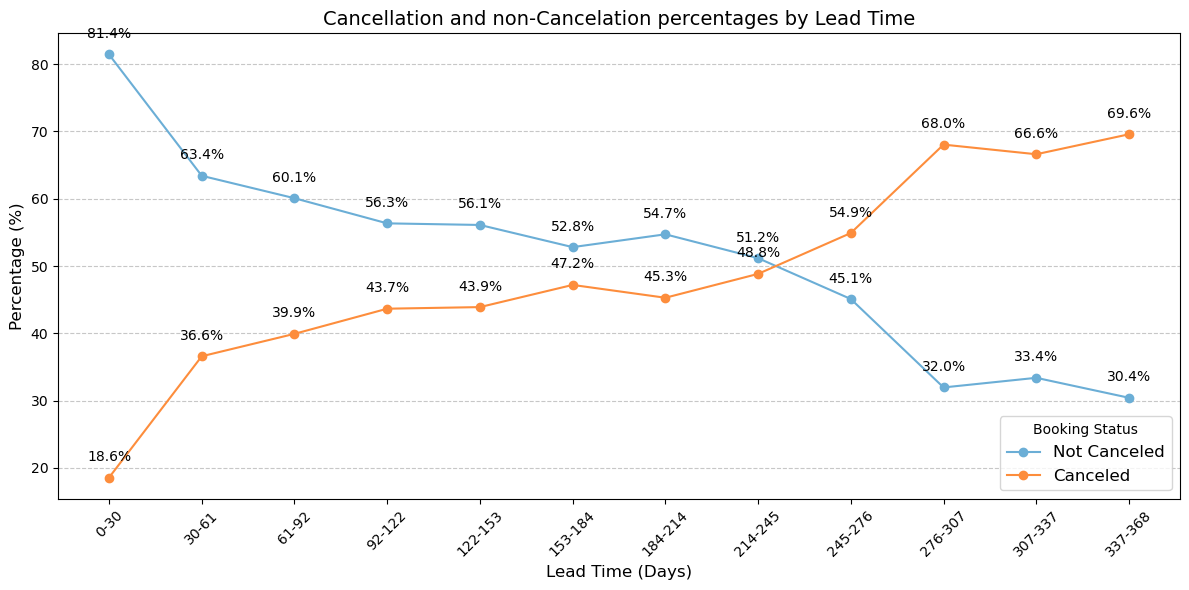

In [187]:
# Define the bins for lead time
bins = 24
bin_edges = np.histogram_bin_edges(df['lead_time'], bins=bins)

# Calculate the histogram counts for each category
hist_data = pd.DataFrame({
    'Not Canceled': np.histogram(df[df['is_canceled'] == 0]['lead_time'], bins=bin_edges)[0],
    'Canceled': np.histogram(df[df['is_canceled'] == 1]['lead_time'], bins=bin_edges)[0]
}, index=pd.IntervalIndex.from_breaks(bin_edges, closed='left'))

# Normalize to percentages
hist_percent = hist_data.div(hist_data.sum(axis=1), axis=0) * 100

# Filter out bins with fewer than 1000 total data points
valid_bins = hist_data.sum(axis=1) >= 1000
filtered_hist_percent = hist_percent[valid_bins]

# Round the bin edges to remove unnecessary decimals
rounded_bins = [f"{int(bin.left)}-{int(bin.right)}" for bin in filtered_hist_percent.index]

# Plot the line chart
plt.figure(figsize=(12, 6))

# Plot each category as a line
plt.plot(rounded_bins, filtered_hist_percent['Not Canceled'], label="Not Canceled", color='#6baed6', marker='o')
plt.plot(rounded_bins, filtered_hist_percent['Canceled'], label="Canceled", color='#fd8d3c', marker='o')

# Add percentage labels on the lines
for i, (index, row) in enumerate(filtered_hist_percent.iterrows()):
    plt.text(i, row['Not Canceled'] + 2, f"{row['Not Canceled']:.1f}%", ha="center", va="bottom", fontsize=10)
    plt.text(i, row['Canceled'] + 2, f"{row['Canceled']:.1f}%", ha="center", va="bottom", fontsize=10)

# Customize plot
plt.title("Cancellation and non-Cancelation percentages by Lead Time", fontsize=14)
plt.xlabel("Lead Time (Days)", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Booking Status", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 4) Cancelation by Market Segment

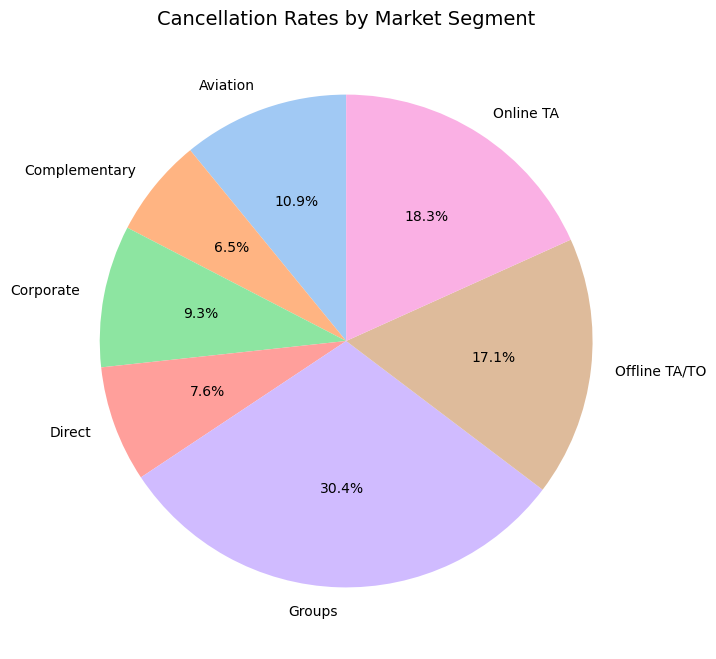

In [188]:
# Calculate cancellation rates by market segment
market_segment_cancellation_rates = df.groupby('market_segment')['is_canceled'].mean() * 100

# Exclude the 'Undefined' market segment (it should not appear in the pie chart)
market_segment_cancellation_rates = market_segment_cancellation_rates[market_segment_cancellation_rates.index != 'Undefined']

# Plot as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(market_segment_cancellation_rates, 
        labels=market_segment_cancellation_rates.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette("pastel", n_colors=len(market_segment_cancellation_rates)))
plt.title("Cancellation Rates by Market Segment", fontsize=14)
plt.show()

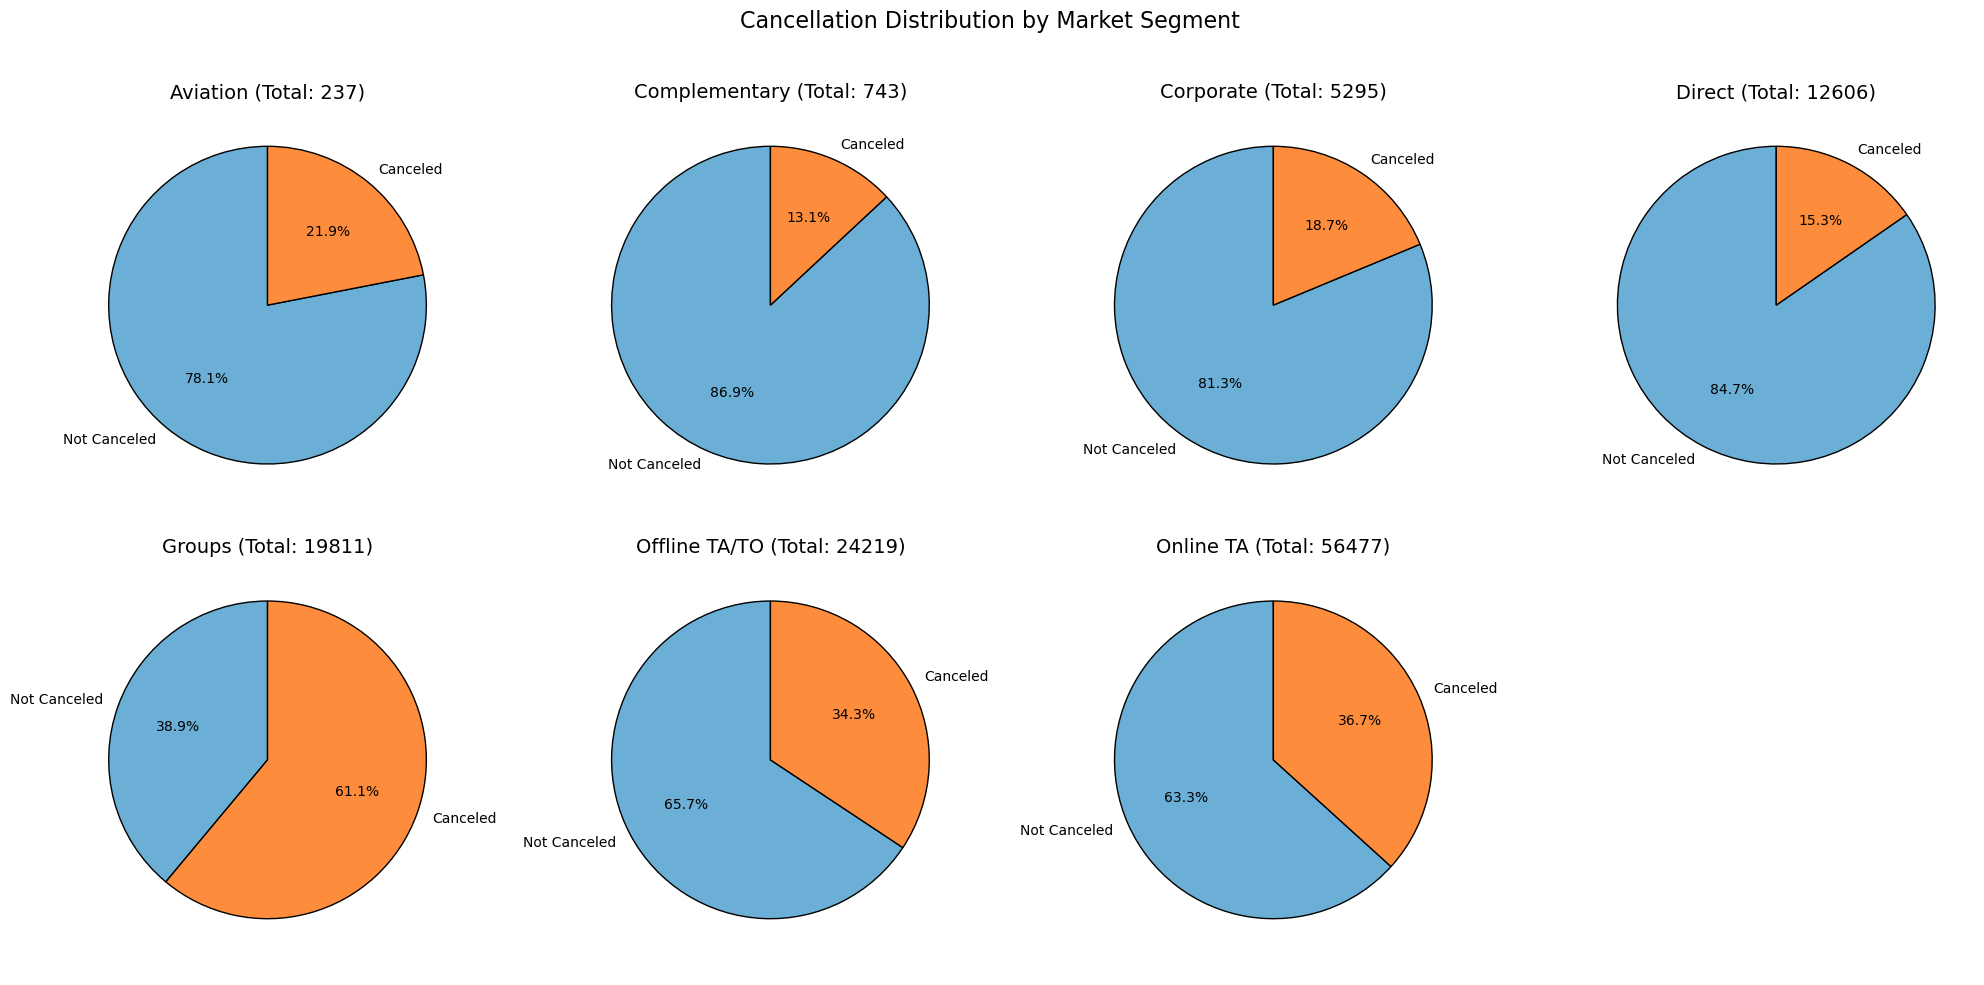

In [189]:
# Group by market_segment and cancellation status, then calculate the counts
market_segment_cancellation = df.groupby(['market_segment', 'is_canceled']).size().unstack(fill_value=0)

# Exclude the 'undefined' market segment if it exists
market_segment_cancellation = market_segment_cancellation[market_segment_cancellation.index != 'Undefined']

# Prepare the figure for a 2x4 grid of pie charts
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Flatten axes to make indexing easier
axes = axes.flatten()

# Loop through each market segment and plot a pie chart
for i, (segment, row) in enumerate(market_segment_cancellation.iterrows()):
    total = row.sum()  # Total number of reservations in this market segment
    canceled_count = row[1]  # Number of canceled reservations
    not_canceled_count = row[0]  # Number of non-canceled reservations

    # Create the pie chart for each market segment
    axes[i].pie([not_canceled_count, canceled_count], 
                labels=["Not Canceled", "Canceled"], 
                autopct='%1.1f%%', 
                startangle=90, 
                colors=['#6baed6', '#fd8d3c'],
                wedgeprops={'edgecolor': 'black'})

    # Set title for each pie chart
    axes[i].set_title(f"{segment} (Total: {total})", fontsize=14)

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Set the title for the entire grid
fig.suptitle("Cancellation Distribution by Market Segment", fontsize=16)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust the top to make space for the figure title
plt.show()

### 5) Cancelation by Distribution channel

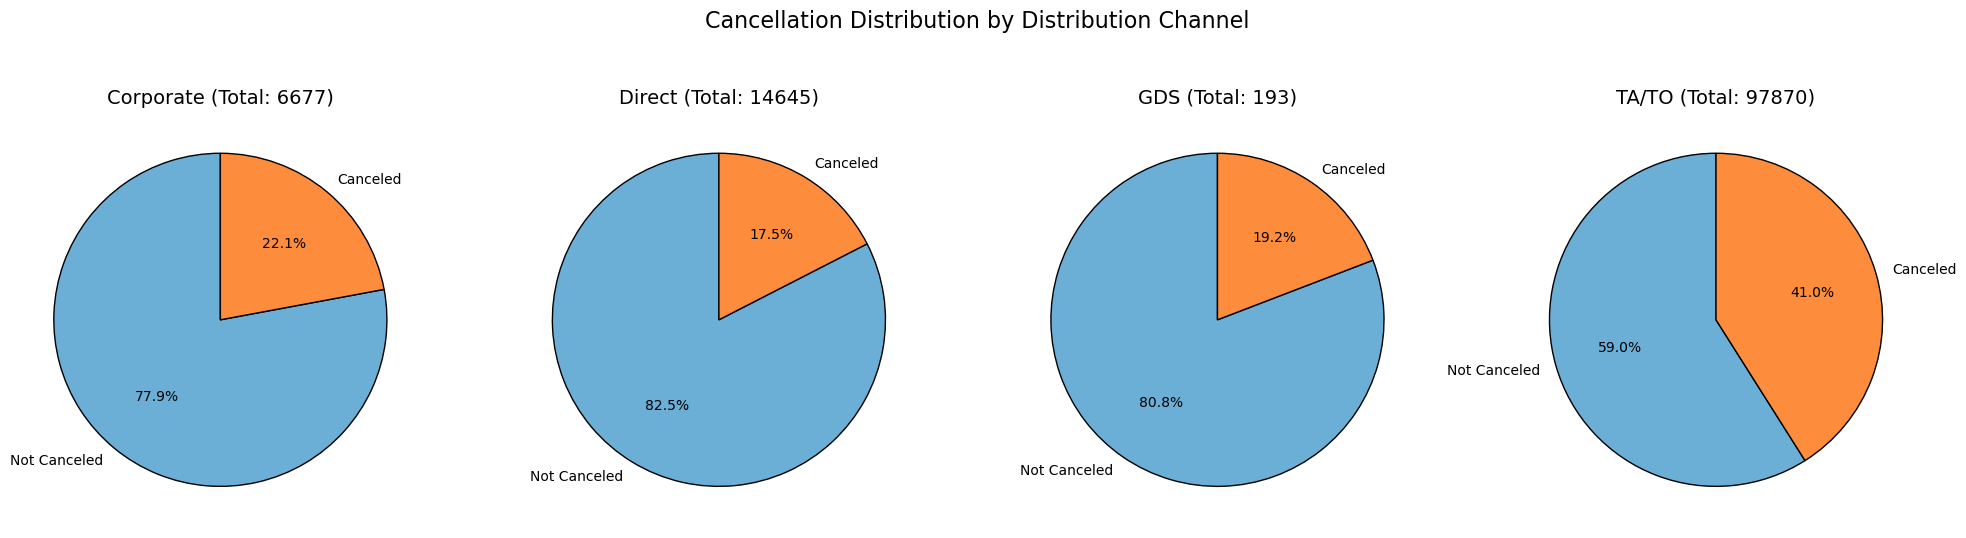

In [190]:
# Group by distribution_channel and cancellation status, then calculate the counts
distribution_channel_cancellation = df.groupby(['distribution_channel', 'is_canceled']).size().unstack(fill_value=0)

# Exclude the 'Undefined' distribution channel if it exists
distribution_channel_cancellation = distribution_channel_cancellation[distribution_channel_cancellation.index != 'Undefined']

# Prepare the figure for a 1x4 grid of pie charts
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))

# Flatten axes to make indexing easier
axes = axes.flatten()

# Loop through each distribution channel and plot a pie chart
for i, (channel, row) in enumerate(distribution_channel_cancellation.iterrows()):
    total = row.sum()  # Total number of reservations in this distribution channel
    canceled_count = row[1]  # Number of canceled reservations
    not_canceled_count = row[0]  # Number of non-canceled reservations

    # Create the pie chart for each distribution channel
    axes[i].pie([not_canceled_count, canceled_count], 
                labels=["Not Canceled", "Canceled"], 
                autopct='%1.1f%%', 
                startangle=90, 
                colors=['#6baed6', '#fd8d3c'],
                wedgeprops={'edgecolor': 'black'})

    # Set title for each pie chart
    axes[i].set_title(f"{channel} (Total: {total})", fontsize=14)

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Set the title for the entire grid
fig.suptitle("Cancellation Distribution by Distribution Channel", fontsize=16)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust the top to make space for the figure title
plt.show()


### 6) Cancelation by Customer type

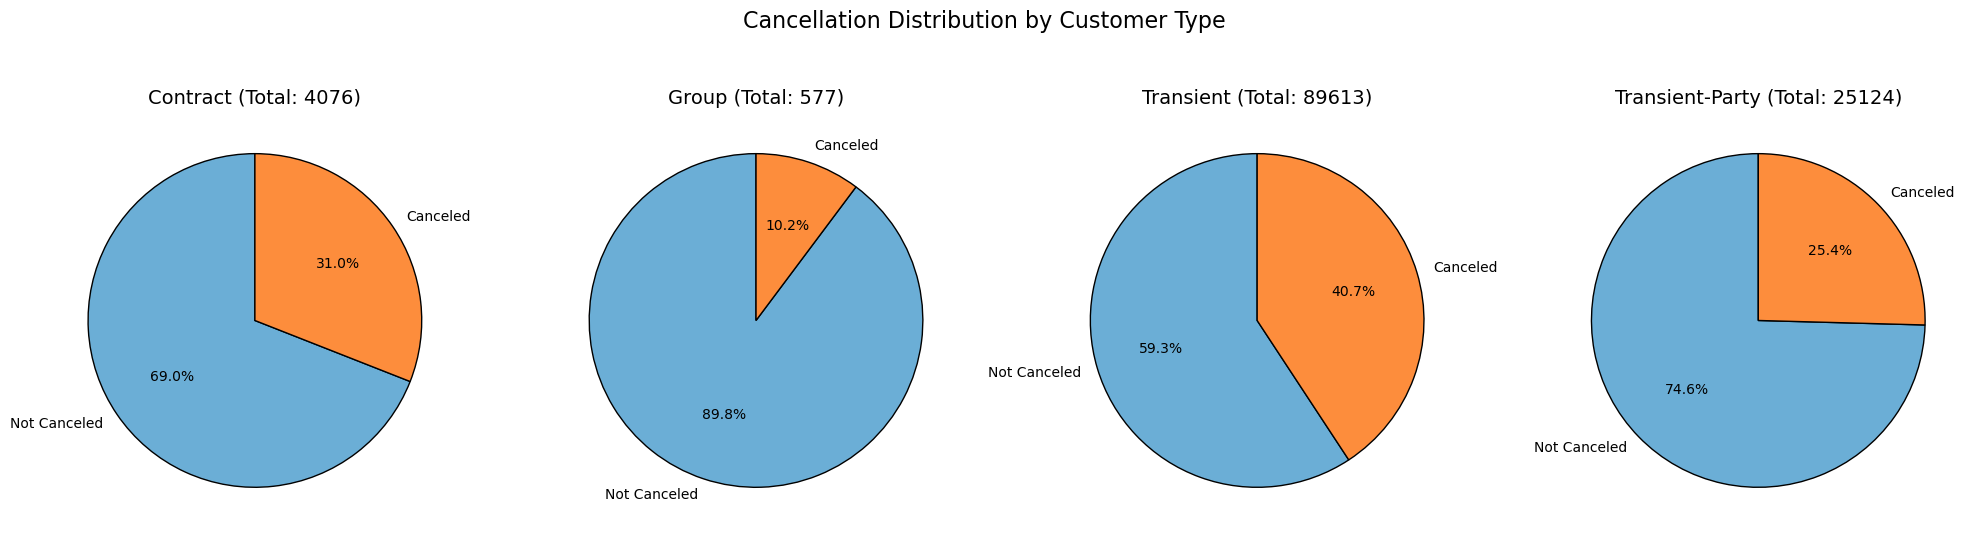

In [191]:
# Group by customer_type and cancellation status, then calculate the counts
customer_type_cancellation = df.groupby(['customer_type', 'is_canceled']).size().unstack(fill_value=0)

# Prepare the figure for a 1x4 grid of pie charts
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))

# Flatten axes to make indexing easier
axes = axes.flatten()

# Loop through each customer type and plot a pie chart
for i, (customer, row) in enumerate(customer_type_cancellation.iterrows()):
    total = row.sum()  # Total number of reservations for this customer type
    canceled_count = row[1]  # Number of canceled reservations
    not_canceled_count = row[0]  # Number of non-canceled reservations

    # Create the pie chart for each customer type
    axes[i].pie([not_canceled_count, canceled_count], 
                labels=["Not Canceled", "Canceled"], 
                autopct='%1.1f%%', 
                startangle=90, 
                colors=['#6baed6', '#fd8d3c'],
                wedgeprops={'edgecolor': 'black'})

    # Set title for each pie chart
    axes[i].set_title(f"{customer} (Total: {total})", fontsize=14)

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Set the title for the entire grid
fig.suptitle("Cancellation Distribution by Customer Type", fontsize=16)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust the top to make space for the figure title
plt.show()

### 7) Cancelation by Room type

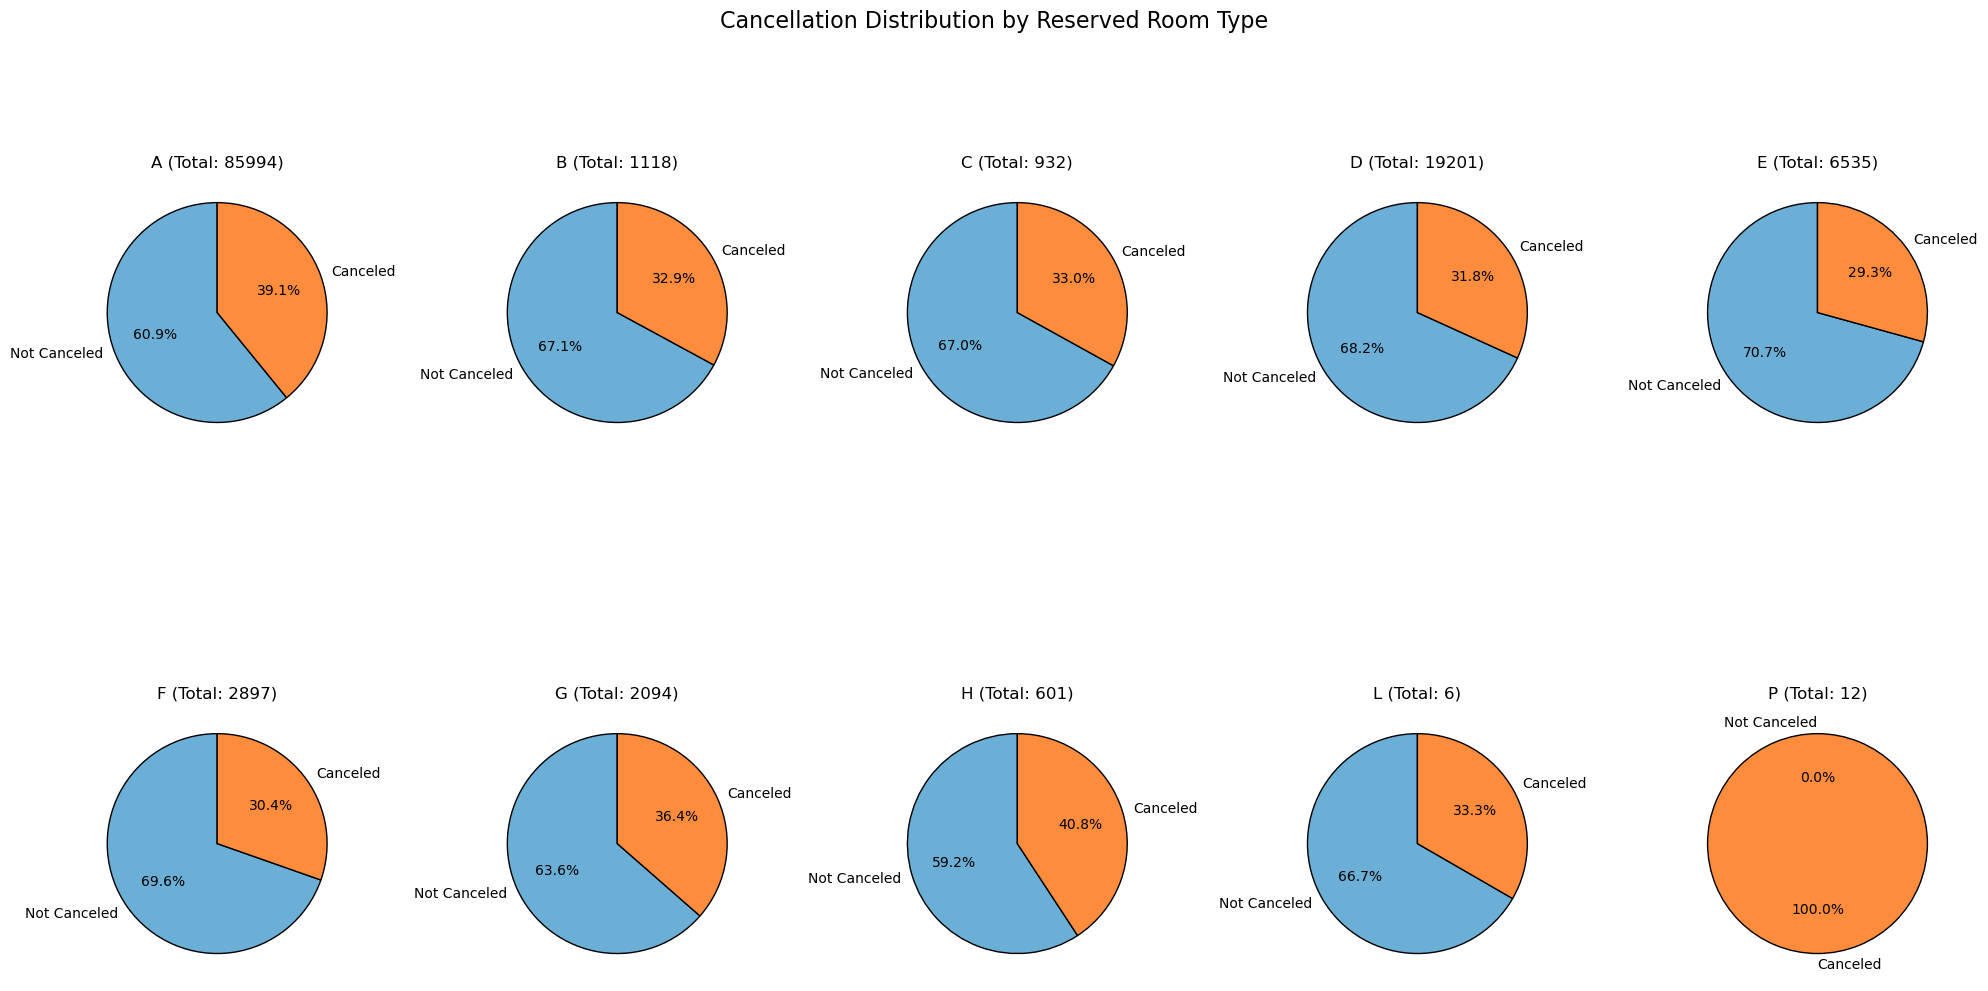

In [192]:
# Group by reserved_room_type and cancellation status, then calculate the counts
reserved_room_type_cancellation = df.groupby(['reserved_room_type', 'is_canceled']).size().unstack(fill_value=0)

# Prepare the figure for a 2x5 grid of pie charts
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 12))

# Flatten axes to make indexing easier
axes = axes.flatten()

# Loop through each reserved room type and plot a pie chart
for i, (room_type, row) in enumerate(reserved_room_type_cancellation.iterrows()):
    total = row.sum()  # Total number of reservations for this room type
    canceled_count = row[1]  # Number of canceled reservations
    not_canceled_count = row[0]  # Number of non-canceled reservations

    # Create the pie chart for each reserved room type
    axes[i].pie([not_canceled_count, canceled_count], 
                labels=["Not Canceled", "Canceled"], 
                autopct='%1.1f%%', 
                startangle=90, 
                colors=['#6baed6', '#fd8d3c'],
                wedgeprops={'edgecolor': 'black'})

    # Set title for each pie chart
    axes[i].set_title(f"{room_type} (Total: {total})", fontsize=12)

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Set the title for the entire grid
fig.suptitle("Cancellation Distribution by Reserved Room Type", fontsize=16)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.subplots_adjust(top=1)  # Adjust the top to make space for the figure title
plt.show()

### 8) Cancelation by Deposit type

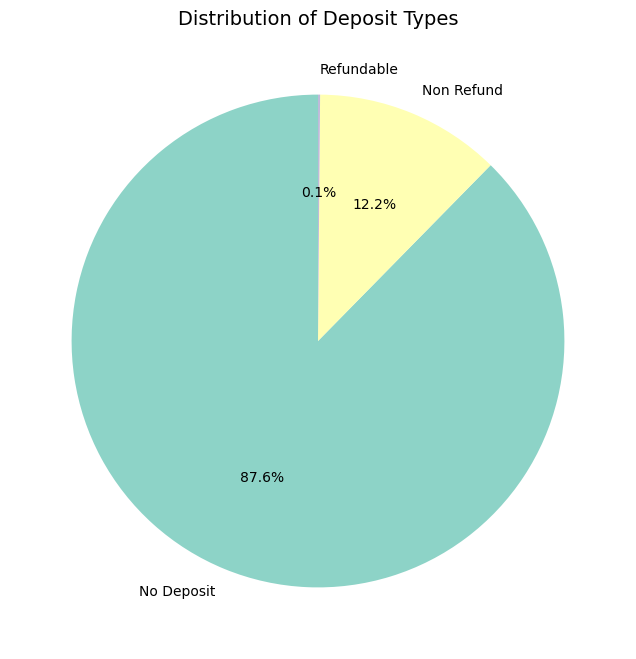

In [193]:
deposit_type_counts = df['deposit_type'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(deposit_type_counts, 
        labels=deposit_type_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette("Set3", n_colors=len(deposit_type_counts)))
plt.title("Distribution of Deposit Types", fontsize=14)
plt.show()

# Training Models

## RandomForestClassifier For Cancellations

Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.99      0.96     14907
        True       0.98      0.90      0.93      8971

    accuracy                           0.95     23878
   macro avg       0.96      0.94      0.95     23878
weighted avg       0.95      0.95      0.95     23878



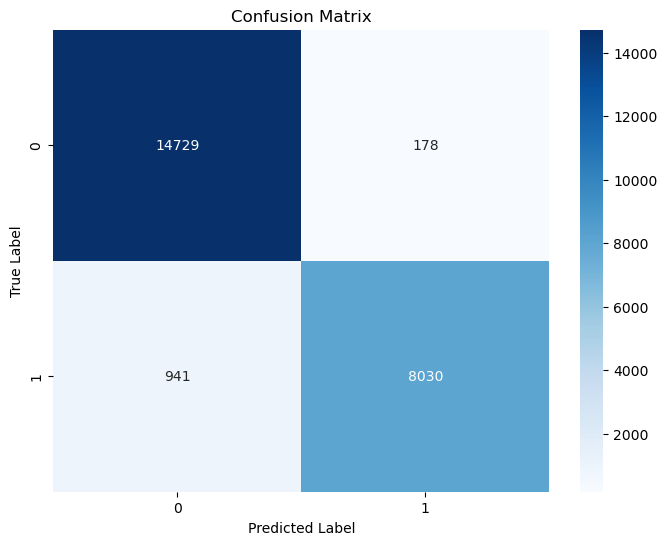

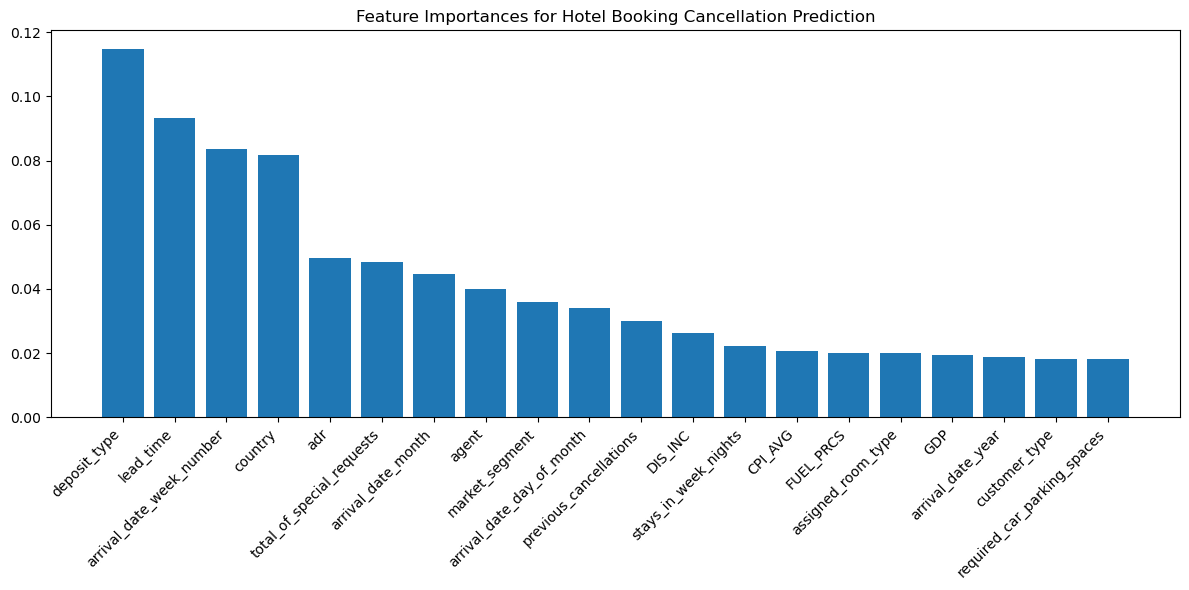


Top 20 Most Important Features:
deposit_type: 0.1149
lead_time: 0.0934
arrival_date_week_number: 0.0837
country: 0.0817
adr: 0.0498
total_of_special_requests: 0.0485
arrival_date_month: 0.0446
agent: 0.0398
market_segment: 0.0360
arrival_date_day_of_month: 0.0340
previous_cancellations: 0.0299
DIS_INC: 0.0263
stays_in_week_nights: 0.0221
CPI_AVG: 0.0208
FUEL_PRCS: 0.0201
assigned_room_type: 0.0200
GDP: 0.0194
arrival_date_year: 0.0188
customer_type: 0.0183
required_car_parking_spaces: 0.0182


In [194]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def prepare_data(df):
    # Create a copy to avoid modifying the original dataframe
    df_model = df.copy()
    
    # Drop columns that shouldn't be used for prediction
    columns_to_drop = ['reservation_status', 'reservation_status_date', 'MO_YR']
    df_model = df_model.drop(columns=columns_to_drop, errors='ignore')
    
    
    # Encode categorical variables
    le = LabelEncoder()
    for column in categorical_columns:
        if column in df_model.columns:
            df_model[column] = le.fit_transform(df_model[column].astype(str))
    
    return df_model

def train_random_forest(X, y):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and train the model
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = rf.predict(X_test)
    
    return rf, X_train, X_test, y_train, y_test, y_pred

def plot_feature_importance(rf, feature_names):
    # Get feature importance
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    # Plot the feature importances
    plt.figure(figsize=(12, 6))
    plt.title("Feature Importances for Hotel Booking Cancellation Prediction")
    plt.bar(range(20), importances[indices][:20])
    plt.xticks(range(20), [feature_names[i] for i in indices][:20], rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Print numerical values
    print("\nTop 20 Most Important Features:")
    for i in range(20):
        print(f"{feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

def analyze_cancellations():
    # Prepare the data
    df_model = prepare_data(df)
    
    # Separate features and target
    X = df_model.drop('is_canceled', axis=1)
    y = df_model['is_canceled']
    
    # Train the model and get predictions
    rf, X_train, X_test, y_train, y_test, y_pred = train_random_forest(X, y)
    
    # Print model performance
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Plot feature importance
    plot_feature_importance(rf, X.columns)
    
    return rf, X, y

# Run the analysis
rf_model, X, y = analyze_cancellations()

## RandomForestRegressor For Stay Duration


Top 5 Most Important Features:
                      feature  importance
8        stays_in_week_nights    0.909466
7     stays_in_weekend_nights    0.090224
26                        adr    0.000044
6   arrival_date_day_of_month    0.000032
28  total_of_special_requests    0.000022

Model Performance:
Mean Squared Error: 0.01
R-squared Score: 1.00


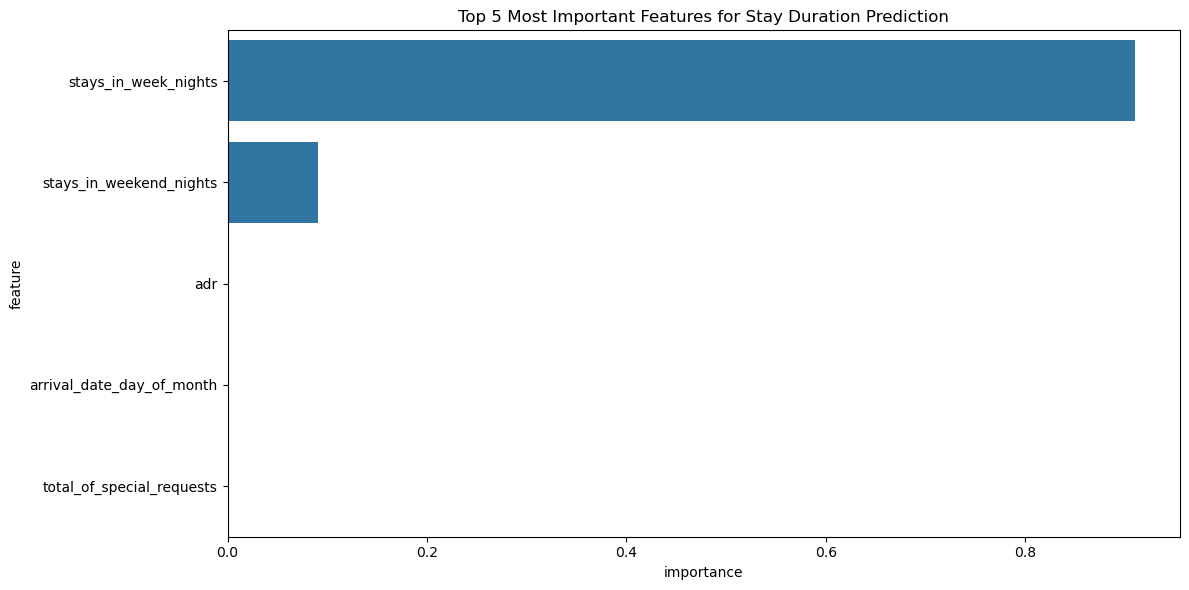

In [196]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

def prepare_data(df):
    # Create total nights column
    df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
    
    # Drop unnecessary columns
    cols_to_drop = ['reservation_status', 'reservation_status_date', 'MO_YR']
    X = df.drop(columns=cols_to_drop + ['total_nights'])
    y = df['total_nights']
    
    # Encode categorical variables
    categorical_cols = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
                       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
                       'deposit_type', 'customer_type', 'agent']
    
    for col in categorical_cols:
        X[col] = pd.Categorical(X[col]).codes
        
    return X, y

def train_model_and_analyze(X, y):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train model
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    
    # Get predictions
    y_pred = rf.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Get feature importance
    importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)
    
    return importance, mse, r2, rf

def plot_feature_importance(importance):
    plt.figure(figsize=(12, 6))
    sns.barplot(x='importance', y='feature', data=importance.head(5))
    plt.title('Top 5 Most Important Features for Stay Duration Prediction')
    plt.tight_layout()
    plt.show()

# Prepare data and train model
X, y = prepare_data(df)
importance, mse, r2, rf = train_model_and_analyze(X, y)

# Print results
print("\nTop 5 Most Important Features:")
print(importance.head(5))
print(f"\nModel Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Plot feature importance
plot_feature_importance(importance)